## A1/IC analysis for pupil/behavior paper
by DS, ZS, CH, SVD

#### 2018/12 DS MADE NOTEBOOK 

**This notebook contains code to generate panels is Figure 3B-C, Figure 4, and Figure 5**

Batches:
* **d_AC_307** DS, SU and MU, onBF and offBF
* **d_IC_309** DS, SU and MU, onBF and offBF

#### 2019/07/23 DS UPDATE   
Models should be all rerun and csv regenerated. 

In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as sci
import statsmodels.formula.api as smf
import matplotlib.collections as clt
import re
import pylab as pl

from nems_lbhb.pupil_behavior_scripts.mod_per_state import get_model_results_per_state_model
from nems_lbhb.pupil_behavior_scripts.mod_per_state import aud_vs_state
from nems_lbhb.pupil_behavior_scripts.mod_per_state import hlf_analysis
from nems_lbhb.stateplots import model_per_time_wrapper, beta_comp

%matplotlib inline
os.getcwd()

color_b = '#C768D8'
color_p = '#47BF55'
color_both = '#000000'
color_either = '#595959'
color_ns = '#BFBFBF'

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 60)

[nems.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2019-07-23 112327.log


Load behavior results

In [2]:
# import all behavior data frame output with Erick's addition of d'prime and 
#criterion calculated with norminv function in Excel
rec_perfdata = pd.read_csv("rec_perfdata.csv", na_values=['#NUM!'])
#all_perfdata = all_perfdata.drop(['Unnamed: 0'], axis=1)
#x = all_perfdata.dropna()

In [3]:
rec_perfdata.head()

,Animal,Parmfile,HR,Probe HR,FAR,Number of Probe Targets,Number of Targets,Number of References,Probe DI (%),DI (%),Probe RT (s),Difficulty,zprobeHR,zHR,zFAR,d prime,probe d prime,Criterion
0,Babybell,bbl031e03_a_PTD.m,0.97,0.93,0.46,7,34,123,0.83,0.78,0.27,Easy,1.475791,1.880794,-0.100434,1.981227,1.576225,-0.890180
1,Babybell,bbl031f03_a_PTD.m,0.98,0.94,0.38,8,46,128,0.84,0.82,0.30,Hard,1.554774,2.053749,-0.305481,2.359230,1.860254,-0.874134
2,Babybell,bbl031f04_a_PTD.m,0.99,0.94,0.32,9,44,74,0.89,0.88,0.24,Easy,1.554774,2.326348,-0.467699,2.794047,2.022472,-0.929325
3,Babybell,bbl031f07_a_PTD.m,0.67,0.67,0.21,12,67,91,0.69,0.71,0.31,Hard,0.439913,0.439913,-0.806421,1.246334,1.246334,0.183254
4,Babybell,bbl031f08_a_PTD.m,0.79,0.67,0.25,12,58,88,0.64,0.69,0.63,Easy,0.439913,0.806421,-0.674490,1.480911,1.114403,-0.065966


Load 307 (A1) and 309 (IC) dataframes

In [4]:
# RUN IF CONNECTED TO SERVER

# A1 SUA+MUA: pup vs. beh 307 per state dataframe
#batch = 307  # A1 SUA and MUA
#state_list = ['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh']
#basemodel = "-ref-psthfr.s_sdexp.S"
#d_pb307 = get_model_results_per_state_model(batch=batch, state_list=state_list, basemodel=basemodel)

In [5]:
# RUN IF NOT CONNECTED TO SERVER 
# A1 SUA+MUA: pup vs. beh 307 per state 
d_pb307 = pd.read_csv('d_307_pb.csv') #model rerun November 8 sdexp.S

In [6]:
d_pb307 = d_pb307.drop(['Unnamed: 0'], axis=1)

# Add extra metadata columns 
d_pb307['R2'] = d_pb307['r']**2 * np.sign(d_pb307['r'])
d_pb307['area'] = 'A1'
d_pb307['sign'] = 'TBD'
d_pb307['experimenter'] = 'DS'
d_pb307['onBF'] = 'TBD'
d_pb307['SU'] = False
d_pb307.loc[d_pb307['isolation']>=90.0, 'SU'] = True
d_pb307['animal'] = d_pb307['cellid'].map(lambda x: x[:3])
d_pb307['task'] = 'TIN'

In [7]:
## RUN IF CONNECTED TO SERVER

# IC SUA+MUA: pup vs. beh 307 per state dataframe
#batch = 309  # IC SUA and MUA
#state_list = ['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh']
#basemodel = "-ref-psthfr.s_stategain.S"
#d_pb309 = get_model_results_per_state_model(batch=batch, state_list=state_list, basemodel=basemodel)

In [8]:
# RUN IF NOT CONNECTED TO SERVER 
# IC SUA+MUA: pup vs. beh 309 per state dataframe
d_pb309 = pd.read_csv('d_309_pb.csv')

In [9]:
d_pb309 = d_pb309.drop(['Unnamed: 0'], axis=1)

# Add extra metadata columns. Some with "TBD" will be filled later
d_pb309['R2'] = d_pb309['r']**2 * np.sign(d_pb309['r'])
d_pb309['onBF'] = 'TBD'
d_pb309['experimenter'] = 'DS'
d_pb309['sign'] = 'TBD'
d_pb309['animal'] = d_pb309['cellid'].map(lambda x: x[:3])
d_pb309['task'] = 'TIN'
d_pb309.loc[d_pb309['animal']=='ley', 'task'] = 'TvN'
d_pb309['SU'] = False
d_pb309.loc[d_pb309['isolation']>=90.0, 'SU'] = True

In [10]:
# load csv with info about ICC and ICX
d_IC_area = pd.read_csv('IC_cells_area.csv')

In [11]:
# merge the dataframes
d_pb309 = pd.merge(left=d_pb309, right=d_IC_area, how='outer', on='cellid')

In [42]:
# ensure there are no nans (nan_rows should be empty)
nan_rows = d_pb309[d_pb309['area'].isnull()]
nan_rows

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2,onBF,experimenter,sign,animal,task,SU,area


Load 307 STRF dataframe generated by running in MATLAB  
`get_ptd_tuning`   
and then running   
`struct2csv(cellframe, 'tuning_info_batch_307.csv')`

In [13]:
d_307_strf = pd.read_csv('tuning_info_batch_307.csv')
d_307_strf = d_307_strf.drop(['Unnamed: 43'], axis=1)

Load 309 STRF dataframe generated by running in MATLAB  
`get_ptd_tuning`   
and then running   
`struct2csv(cellframe, 'tuning_info_batch_309.csv')`

In [14]:
d_309_strf = pd.read_csv('tuning_info_batch_309.csv')
d_309_strf = d_309_strf.drop(['Unnamed: 43'], axis=1)

Concatenate 307 and 309 data dataframes

In [15]:
d_307_309 = pd.concat([d_pb307, d_pb309], sort=False)

Concatenate 307 and 309 strf dataframes

In [16]:
d_307_309_strf = pd.concat([d_307_strf, d_309_strf], sort=False)

Merge it all

In [17]:
df = pd.merge(left=d_307_309, right=d_307_309_strf, how='outer', on='cellid')

In [18]:
def fix_TBD_onBF(df):
    '''This function takes the monster dataframe and adds True to the column 'onBF' when 'ACTIVE_1_tardist' is
    within 0.5 --> half an octave between unit BF and target frequency in ACTIVE 1'''
    BF_TBD = (df['onBF']=='TBD')
    df.loc[BF_TBD, 'onBF'] = df.loc[BF_TBD, 'ACTIVE_1_tardist'].map(lambda x: abs(x)<=0.5)
    return df

In [19]:
df['onBF'].value_counts()

TBD    2280
Name: onBF, dtype: int64

In [20]:
df = fix_TBD_onBF(df)

In [21]:
df['onBF'].value_counts()

False    1380
True      900
Name: onBF, dtype: int64

In [22]:
df['area'].value_counts()

A1     1488
ICX     576
ICC     216
Name: area, dtype: int64

In [23]:
df.head()

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2,area,sign,experimenter,onBF,SU,animal,task,bestsnr,bestbf,PASSIVE_0_snr,PASSIVE_0_bf,PASSIVE_0,ACTIVE_1_snr,ACTIVE_1_bf,ACTIVE_1,ACTIVE_1_tf,ACTIVE_1_tardist,PASSIVE_1_snr,...,PASSIVE_1,ACTIVE_2_snr,ACTIVE_2_bf,ACTIVE_2,ACTIVE_2_tf,ACTIVE_2_tardist,ACTIVE_3_snr,ACTIVE_3_bf,ACTIVE_3,ACTIVE_3_tf,ACTIVE_3_tardist,ACTIVE_0_snr,ACTIVE_0_bf,ACTIVE_0,ACTIVE_0_tf,ACTIVE_0_tardist,PASSIVE_2_snr,PASSIVE_2_bf,PASSIVE_2,PASSIVE_3_snr,PASSIVE_3_bf,PASSIVE_3,ACTIVE_4_snr,ACTIVE_4_bf,ACTIVE_4,ACTIVE_4_tf,ACTIVE_4_tardist,PASSIVE_4_snr,PASSIVE_4_bf,PASSIVE_4
0,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,baseline,NaN,85.0,0.959477,0.001803,0.001100,1.055582,baseline,0.920596,A1,TBD,DS,False,False,BRT,TIN,0.23821,13337,0.12334,15342,BRT037b05_p_PTD.m,0.23821,13337.0,BRT037b06_a_PTD.m,8500.0,0.6499,0.091493,...,BRT037b07_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19291,12435.0,BRT037b04_a_PTD.m,8500.0,0.6499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,pupil,0.002733,85.0,0.959477,0.001803,-0.018649,0.017949,pupil,0.920596,A1,TBD,DS,False,False,BRT,TIN,0.23821,13337,0.12334,15342,BRT037b05_p_PTD.m,0.23821,13337.0,BRT037b06_a_PTD.m,8500.0,0.6499,0.091493,...,BRT037b07_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19291,12435.0,BRT037b04_a_PTD.m,8500.0,0.6499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,active,0.000481,85.0,0.959477,0.001803,0.012940,0.091997,active,0.920596,A1,TBD,DS,False,False,BRT,TIN,0.23821,13337,0.12334,15342,BRT037b05_p_PTD.m,0.23821,13337.0,BRT037b06_a_PTD.m,8500.0,0.6499,0.091493,...,BRT037b07_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19291,12435.0,BRT037b04_a_PTD.m,8500.0,0.6499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,baseline,NaN,85.0,0.960591,0.001745,0.000525,1.068410,baseline,0.922735,A1,TBD,DS,False,False,BRT,TIN,0.23821,13337,0.12334,15342,BRT037b05_p_PTD.m,0.23821,13337.0,BRT037b06_a_PTD.m,8500.0,0.6499,0.091493,...,BRT037b07_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19291,12435.0,BRT037b04_a_PTD.m,8500.0,0.6499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,pupil,-0.016204,85.0,0.960591,0.001745,-0.035914,0.019207,pupil,0.922735,A1,TBD,DS,False,False,BRT,TIN,0.23821,13337,0.12334,15342,BRT037b05_p_PTD.m,0.23821,13337.0,BRT037b06_a_PTD.m,8500.0,0.6499,0.091493,...,BRT037b07_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.19291,12435.0,BRT037b04_a_PTD.m,8500.0,0.6499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Example cells TAR010c-27-2 (A1 behavior cell) and TAR010c-06-1 (A1 pupil cell)
df.loc[df['cellid']=='TAR010c-06-1']

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2,area,sign,experimenter,onBF,SU,animal,task,bestsnr,bestbf,PASSIVE_0_snr,PASSIVE_0_bf,PASSIVE_0,ACTIVE_1_snr,ACTIVE_1_bf,ACTIVE_1,ACTIVE_1_tf,ACTIVE_1_tardist,PASSIVE_1_snr,...,PASSIVE_1,ACTIVE_2_snr,ACTIVE_2_bf,ACTIVE_2,ACTIVE_2_tf,ACTIVE_2_tardist,ACTIVE_3_snr,ACTIVE_3_bf,ACTIVE_3,ACTIVE_3_tf,ACTIVE_3_tardist,ACTIVE_0_snr,ACTIVE_0_bf,ACTIVE_0,ACTIVE_0_tf,ACTIVE_0_tardist,PASSIVE_2_snr,PASSIVE_2_bf,PASSIVE_2,PASSIVE_3_snr,PASSIVE_3_bf,PASSIVE_3,ACTIVE_4_snr,ACTIVE_4_bf,ACTIVE_4,ACTIVE_4_tf,ACTIVE_4_tardist,PASSIVE_4_snr,PASSIVE_4_bf,PASSIVE_4
828,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,baseline,NaN,100.0,0.622946,0.017878,-0.005619,1.028697,baseline,0.388061,A1,TBD,DS,True,True,TAR,TIN,0.06424,370,0.016692,1260,TAR010c04_p_PTD.m,0.055282,1095.0,TAR010c09_a_PTD.m,500.0,-0.4344,0.06424,...,TAR010c10_p_PTD.m,0.057073,1305.0,TAR010c11_a_PTD.m,500.0,-0.4344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020225,4000.0,TAR010c12_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,pupil,0.002463,100.0,0.622946,0.017878,-0.024425,-0.014181,pupil,0.388061,A1,TBD,DS,True,True,TAR,TIN,0.06424,370,0.016692,1260,TAR010c04_p_PTD.m,0.055282,1095.0,TAR010c09_a_PTD.m,500.0,-0.4344,0.06424,...,TAR010c10_p_PTD.m,0.057073,1305.0,TAR010c11_a_PTD.m,500.0,-0.4344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020225,4000.0,TAR010c12_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
830,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,active,0.001464,100.0,0.622946,0.017878,0.009296,0.080130,active,0.388061,A1,TBD,DS,True,True,TAR,TIN,0.06424,370,0.016692,1260,TAR010c04_p_PTD.m,0.055282,1095.0,TAR010c09_a_PTD.m,500.0,-0.4344,0.06424,...,TAR010c10_p_PTD.m,0.057073,1305.0,TAR010c11_a_PTD.m,500.0,-0.4344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020225,4000.0,TAR010c12_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,baseline,NaN,100.0,0.624754,0.017237,0.020796,0.897911,baseline,0.390318,A1,TBD,DS,True,True,TAR,TIN,0.06424,370,0.016692,1260,TAR010c04_p_PTD.m,0.055282,1095.0,TAR010c09_a_PTD.m,500.0,-0.4344,0.06424,...,TAR010c10_p_PTD.m,0.057073,1305.0,TAR010c11_a_PTD.m,500.0,-0.4344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020225,4000.0,TAR010c12_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,pupil,0.030070,100.0,0.624754,0.017237,-0.020482,-0.020647,pupil,0.390318,A1,TBD,DS,True,True,TAR,TIN,0.06424,370,0.016692,1260,TAR010c04_p_PTD.m,0.055282,1095.0,TAR010c09_a_PTD.m,500.0,-0.4344,0.06424,...,TAR010c10_p_PTD.m,0.057073,1305.0,TAR010c11_a_PTD.m,500.0,-0.4344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020225,4000.0,TAR010c12_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833,TAR010c-06-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,active,0.066933,100.0,0.624754,0.017237,0.504823,1.040144,active,0.390318,A1,TBD,DS,True,True,TAR,TIN,0.06424,370,0.016692,1260,TAR010c04_p_PTD.m,0.055282,1095.0,TAR010c09_a_PTD.m,500.0,-0.4344,0.06424,...,TAR010c10_p_PTD.m,0.057073,1305.0,TAR010c11_a_PTD.m,500.0,-0.4344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020225,4000.0,TAR010c12_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
834,TAR010c-06-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_sdex...,st.pup.beh0,baseline,NaN,100.0,0.718885,0.015773,-1.822483,2.074838,baseline,0.516795,A1,TBD,DS,True,True,TAR,TIN,0.06424,370,0.016692,1260,TAR010c04_p_PTD.m,0.055282,1095.0,TAR010c09_a_PTD.m,500.0,-0.4344,0.06424,...,TAR010c10_p_PTD.m,0.057073,1305.0,TAR010c11_a_PTD.m,500.0,-0.4344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.020225,4000.0,TAR010c12_p_PTD.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835,TAR010c-06-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_sdex...,st.pup.beh0

In [96]:
# creating subdf with only rows that match conditions
is_active = (df['state_chan']=='active')
is_pupil = (df['state_chan']=='pupil')
full_model = (df['state_sig']=='st.pup.beh')
null_model = (df['state_sig']=='st.pup0.beh0')
part_beh_model = (df['state_sig']=='st.pup0.beh')
part_pup_model = (df['state_sig']=='st.pup.beh0')

# adding new colums to df with differences of R2 full-null, MI full-partial pup, 
# and MI partial beh-null
for cellid in df['cellid'].unique():
    mask_for_cellid = df['cellid']==cellid
    active_full = df[is_active & full_model & mask_for_cellid]
    active_null = df[is_active & null_model & mask_for_cellid]
    active_part_beh = df[is_active & part_beh_model & mask_for_cellid]
    active_part_pup = df[is_active & part_pup_model & mask_for_cellid]
    
    pupil_full = df[is_pupil & full_model & mask_for_cellid]
    pupil_null = df[is_pupil & null_model & mask_for_cellid]
    pupil_part_beh = df[is_pupil & part_beh_model & mask_for_cellid]
    pupil_part_pup = df[is_pupil & part_pup_model & mask_for_cellid]
    
    if len(active_full) != 1:
        print(f'WARNING: active full is not one for {cellid}')
        continue
    if len(active_null) != 1:
        print(f'WARNING: active null is not one for {cellid}')
        continue
    if len(active_part_beh) != 1:
        print(f'WARNING: active part beh is not one for {cellid}')
        continue
    if len(active_part_pup) != 1:
        print(f'WARNING: active part pup is not one for {cellid}')
        continue
    df.loc[mask_for_cellid, 'R2_diff'] = active_full.iloc[0]['R2']-active_null.iloc[0]['R2']
    df.loc[mask_for_cellid, 'R2beh_unique'] = active_full.iloc[0]['R2']-active_part_pup.iloc[0]['R2']
    df.loc[mask_for_cellid, 'R2pup_unique'] = active_full.iloc[0]['R2']-active_part_beh.iloc[0]['R2']
    
    df.loc[mask_for_cellid, 'MIbeh_only'] = active_part_beh.iloc[0]['MI']-active_null.iloc[0]['MI']
    
    df.loc[mask_for_cellid, 'MIbeh_unique'] = active_full.iloc[0]['MI']-active_part_pup.iloc[0]['MI']
    df.loc[mask_for_cellid, 'MIpup_unique'] = pupil_full.iloc[0]['MI']-pupil_part_beh.iloc[0]['MI']
    
    
    # adding new colums to df with significance
    r_pup_beh = active_full.iloc[0]['r']
    r_pup_beh0 = active_part_pup.iloc[0]['r']
    r_pup0_beh = active_part_beh.iloc[0]['r']
    rse_pup_beh = active_full.iloc[0]['r_se']
    rse_pup_beh0 = active_part_pup.iloc[0]['r_se']
    rse_pup0_beh = active_part_beh.iloc[0]['r_se']
    r_pup0_beh0 = active_null.iloc[0]['r']
    rse_pup0_beh0 = active_null.iloc[0]['r_se']
    
    #units that had significant unique behavior
    df.loc[mask_for_cellid, 'sig_ubeh'] = (r_pup_beh - r_pup_beh0) > (rse_pup_beh + rse_pup_beh0)
    #units that had significant unique pupil
    df.loc[mask_for_cellid, 'sig_upup'] = (r_pup_beh - r_pup0_beh) > (rse_pup_beh + rse_pup0_beh)
    #units that had significant unique behavior or pupil
    df.loc[mask_for_cellid, 'sig_state'] = (r_pup_beh - r_pup0_beh0) > (rse_pup_beh + rse_pup0_beh0)
    #units that had significant behavior in behavior partial model
    df.loc[mask_for_cellid, 'sig_obeh'] = (r_pup0_beh - r_pup0_beh0) > (rse_pup0_beh + rse_pup0_beh0)
    

In [91]:
df.head()

,cellid,modelname,state_sig,state_chan,MI,isolation,r,r_se,d,g,state_chan_alt,R2,area,sign,experimenter,onBF,SU,animal,task,bestsnr,bestbf,PASSIVE_0_snr,PASSIVE_0_bf,PASSIVE_0,ACTIVE_1_snr,ACTIVE_1_bf,ACTIVE_1,ACTIVE_1_tf,ACTIVE_1_tardist,PASSIVE_1_snr,...,ACTIVE_3_tardist,ACTIVE_0_snr,ACTIVE_0_bf,ACTIVE_0,ACTIVE_0_tf,ACTIVE_0_tardist,PASSIVE_2_snr,PASSIVE_2_bf,PASSIVE_2,PASSIVE_3_snr,PASSIVE_3_bf,PASSIVE_3,ACTIVE_4_snr,ACTIVE_4_bf,ACTIVE_4,ACTIVE_4_tf,ACTIVE_4_tardist,PASSIVE_4_snr,PASSIVE_4_bf,PASSIVE_4,R2_diff,R2beh_unique,R2pup_unique,MIbeh_only,MIbeh_unique,MIpup_unique,sig_ubeh,sig_upup,sig_state,sig_obeh
0,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,baseline,NaN,85.0,0.959477,0.001803,0.001100,1.055582,baseline,0.920596,A1,TBD,DS,False,False,BRT,TIN,0.23821,13337,0.12334,15342,BRT037b05_p_PTD.m,0.23821,13337.0,BRT037b06_a_PTD.m,8500.0,0.6499,0.091493,...,NaN,0.19291,12435.0,BRT037b04_a_PTD.m,8500.0,0.6499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00175,0.001317,-0.000388,-0.034643,-0.032365,0.000782,False,False,False,False
1,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,pupil,0.002733,85.0,0.959477,0.001803,-0.018649,0.017949,pupil,0.920596,A1,TBD,DS,False,False,BRT,TIN,0.23821,13337,0.12334,15342,BRT037b05_p_PTD.m,0.23821,13337.0,BRT037b06_a_PTD.m,8500.0,0.6499,0.091493,...,NaN,0.19291,12435.0,BRT037b04_a_PTD.m,8500.0,0.6499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00175,0.001317,-0.000388,-0.034643,-0.032365,0.000782,False,False,False,False
2,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sde...,st.pup0.beh0,active,0.000481,85.0,0.959477,0.001803,0.012940,0.091997,active,0.920596,A1,TBD,DS,False,False,BRT,TIN,0.23821,13337,0.12334,15342,BRT037b05_p_PTD.m,0.23821,13337.0,BRT037b06_a_PTD.m,8500.0,0.6499,0.091493,...,NaN,0.19291,12435.0,BRT037b04_a_PTD.m,8500.0,0.6499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00175,0.001317,-0.000388,-0.034643,-0.032365,0.000782,False,False,False,False
3,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,baseline,NaN,85.0,0.960591,0.001745,0.000525,1.068410,baseline,0.922735,A1,TBD,DS,False,False,BRT,TIN,0.23821,13337,0.12334,15342,BRT037b05_p_PTD.m,0.23821,13337.0,BRT037b06_a_PTD.m,8500.0,0.6499,0.091493,...,NaN,0.19291,12435.0,BRT037b04_a_PTD.m,8500.0,0.6499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00175,0.001317,-0.000388,-0.034643,-0.032365,0.000782,False,False,False,False
4,BRT037b-24-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_sdex...,st.pup0.beh,pupil,-0.016204,85.0,0.960591,0.001745,-0.035914,0.019207,pupil,0.922735,A1,TBD,DS,False,False,BRT,TIN,0.23821,13337,0.12334,15342,BRT037b05_p_PTD.m,0.23821,13337.0,BRT037b06_a_PTD.m,8500.0,0.6499,0.091493,...,NaN,0.19291,12435.0,BRT037b04_a_PTD.m,8500.0,0.6499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00175,0.001317,-0.000388,-0.034643,-0.032365,0.000782,False,False,False,False


## Separate units according to their significance

1. **Find A1 units for which the unique contribution of behavior is significant** Purple    
`sig_ubeh = r_pup_beh - r_pup_beh0 > rse_pup_beh + rse_pup_beh0` where 'r' is Pearson's correlation  

2. **Find A1 units for which the unique contribution of pupil is significant** Green    
`sig_upup = r_pup_beh - r_pup0_beh > rse_pup_beh + rse_pup0_beh` where 'r' is Pearson's correlation  

3. **Find A1 units for which the full state model is significantly better than the null model (ambiguous)** Dark Black  
`sig_state = r_pup_beh - r_pup0_beh0 > rse_pup_beh + rse_pup0_beh0` where 'r' is Pearson's correlation

4. `sig_both` is when both `sig_ubeh` and `sig_upup` are true

5. not significant

In [26]:
# creating list of booleans to mask A1, IC, onBF and offBF out of big df
A1 = df['area']=='A1'
ICC = df['area']=='ICC'
ICX = df['area']=='ICX'
onBF = df['onBF']==True
offBF = df['onBF']==False
SU = df['SU']==True
sig_ubeh = df['sig_ubeh']==True
sig_upup = df['sig_upup']==True
sig_both = sig_ubeh & sig_upup
sig_state = df['sig_state']==True
sig_obeh = df['sig_obeh']==True
sig_oubeh = sig_ubeh | sig_obeh

In [27]:
def scat_states(x_model, 
                y_model, 
                beh_state, 
                area, 
                sig_list, 
                x_column, 
                y_column,
                color_list,
                highlight_cellids={},
                hue=False,
                save=False,
                pup_state=None,
                xlabel=None,
                ylabel=None,
                title=None,
                xlim=None, 
                ylim=None):
    
    '''This function makes a scatter plots of identified arguments. 
    sig_list = ~sig_state, sig_state, sig_ubeh, sig_upup, sig_both]
    color_list = ['#D3D3D3', '#595959', '#82418B', '#2E7E3E', '#000000']
    
    TODO: make sig_list and color_list into a dict
    highlight_cellid has to be a dict 'cellid':'color' 
    add hue if istead of plotting color for stat sign units,
    you want to plot different color based on values in a column (eg onBF)'''
    
    
    plt.figure(figsize=(6,6))
    
    # need a slope and c to fix the position of line
    if xlim is not None:
        xlim = xlim 
        ylim = ylim
        slope = 1
        c = xlim[0]

        x_min = xlim[0]
        x_max = xlim[1]
        y_min, y_max = c, c + slope*(x_max-x_min)
        plt.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
        
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

    plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
    plt.axhline(0, linestyle='--', linewidth=0.5, color='k')
  
    
    if area is not ICC:
        marker = 'o'
    else:
        marker = '^'   
        
    if hue:
        sns.scatterplot(x=df.loc[x_model & beh_state & area, x_column].tolist(), 
                        y=df.loc[y_model & beh_state & area, y_column].tolist(), 
                        s = 200, hue = df.loc[x_model & beh_state & area, hue],
                        marker = marker, edgecolors = 'white', linewidth = 0.5)
        
    elif pup_state:
        # plot not significant units
        plt.scatter(x=df.loc[x_model & pup_state & area & sig_list[0], x_column].tolist(), 
                    y=df.loc[y_model & beh_state & area & sig_list[0], y_column].tolist(), 
                    s = 150, color = color_list[0], marker = marker, edgecolors = 'white', linewidth = 0.5) 
    
        # plot significant state units
        plt.scatter(x=df.loc[x_model & pup_state & area & sig_list[1], x_column].tolist(), 
                    y=df.loc[y_model & beh_state & area & sig_list[1], y_column].tolist(), 
                    s = 200, color = color_list[1], marker = marker, edgecolors = 'white',linewidth = 0.5)

        # plot significant unique behavior
        plt.scatter(x=df.loc[x_model & pup_state & area & sig_list[2], x_column].tolist(), 
                    y=df.loc[y_model & beh_state & area & sig_list[2], y_column].tolist(), 
                    s = 200, color = color_list[2], marker = marker, edgecolors = 'white',linewidth = 0.5)

        # plot significant unique pupil
        plt.scatter(x=df.loc[x_model & pup_state & area & sig_list[3], x_column].tolist(), 
                    y=df.loc[y_model & beh_state & area & sig_list[3], y_column].tolist(), 
                    s = 200, color = color_list[3], marker = marker, edgecolors = 'white', linewidth = 0.5)

        # plot significant unique both
        plt.scatter(x=df.loc[x_model & pup_state & area & sig_list[4], x_column].tolist(), 
                    y=df.loc[y_model & beh_state & area & sig_list[4], y_column].tolist(), 
                    s = 200, color = color_list[4], marker = marker, edgecolors = 'white', linewidth = 0.5)
         
    else:
        # plot not significant units
        plt.scatter(x=df.loc[x_model & beh_state & area & sig_list[0], x_column].tolist(), 
                    y=df.loc[y_model & beh_state & area & sig_list[0], y_column].tolist(), 
                    s = 150, color = color_list[0], marker = marker, edgecolors = 'white', linewidth = 0.5) 
    
        # plot significant state units
        plt.scatter(x=df.loc[x_model & beh_state & area & sig_list[1], x_column].tolist(), 
                    y=df.loc[y_model & beh_state & area & sig_list[1], y_column].tolist(), 
                    s = 200, color = color_list[1], marker = marker, edgecolors = 'white',linewidth = 0.5)

        # plot significant unique behavior
        plt.scatter(x=df.loc[x_model & beh_state & area & sig_list[2], x_column].tolist(), 
                    y=df.loc[y_model & beh_state & area & sig_list[2], y_column].tolist(), 
                    s = 200, color = color_list[2], marker = marker, edgecolors = 'white',linewidth = 0.5)

        # plot significant unique pupil
        plt.scatter(x=df.loc[x_model & beh_state & area & sig_list[3], x_column].tolist(), 
                    y=df.loc[y_model & beh_state & area & sig_list[3], y_column].tolist(), 
                    s = 200, color = color_list[3], marker = marker, edgecolors = 'white', linewidth = 0.5)

        # plot significant unique both
        plt.scatter(x=df.loc[x_model & beh_state & area & sig_list[4], x_column].tolist(), 
                    y=df.loc[y_model & beh_state & area & sig_list[4], y_column].tolist(), 
                    s = 200, color = color_list[4], marker = marker, edgecolors = 'white', linewidth = 0.5)
    
    # plot a cellid (e.g. TAR010c-27-2 (A1 behavior cell) or TAR010c-06-1 (A1 pupil cell)) with special color
    
    if type(highlight_cellids) is not dict:
        raise Exception('highlight_cellids has got to be a dict!')
    else:
        for cellid, color in highlight_cellids.items():
            plt.scatter(x=df.loc[x_model & beh_state & area & (df['cellid']==cellid), x_column].tolist(), 
                        y=df.loc[y_model & beh_state & area & (df['cellid']==cellid), y_column].tolist(), 
                        s = 200, color = color, marker = marker, edgecolors = 'white', linewidth=0.5)

    if save:
        plt.savefig(title+ylabel+xlabel+'.pdf')

0.20773262630211844
0.10343150769346543


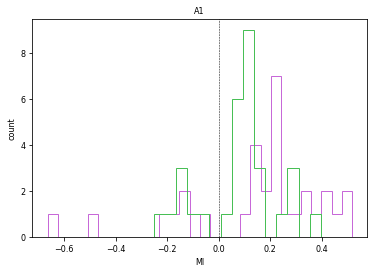

In [54]:
print((df.loc[full_model & is_active & A1 & sig_oubeh, 'MIbeh_only']).median())
print((df.loc[full_model & is_active & A1 & sig_oubeh, 'MIbeh_unique']).median())

a = df.loc[full_model & is_active & A1 & sig_oubeh, 'MIbeh_only']
b = df.loc[full_model & is_active & A1 & sig_oubeh, 'MIbeh_unique']
plt.hist(a, bins=30, color=color_b, histtype=u'step')
plt.hist(b, bins=15, color=color_p, histtype=u'step')
plt.xlabel('MI')
plt.ylabel('count')
plt.title('A1')
plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
#plt.savefig('A1_MIcomp.pdf')

In [50]:
print('A1 had {} units for which behavior alone sign modulated activity'.format(len(df.loc[full_model & is_active & A1 & sig_obeh])))
print('A1 had {} units for which behavior unique sign modulated activity'.format(len(df.loc[full_model & is_active & A1 & sig_ubeh])))
print('A1 had {} units for which behavior either only or unique sign modulated activity'.format(len(df.loc[full_model & is_active & A1 & 
                                                                                                           sig_oubeh])))
print('IC had {} units for which behavior alone sign modulated activity'.format(len(df.loc[full_model & is_active & (ICC | ICX) & sig_obeh])))
print('IC had {} units for which behavior unique sign modulated activity'.format(len(df.loc[full_model & is_active & (ICC | ICX) & sig_ubeh])))

A1 had 26 units for which behavior alone sign modulated activity
A1 had 15 units for which behavior unique sign modulated activity
A1 had 31 units for which behavior either only or unique sign modulated activity
IC had 15 units for which behavior alone sign modulated activity
IC had 8 units for which behavior unique sign modulated activity


-0.007283511937444401
-0.01938787742098954


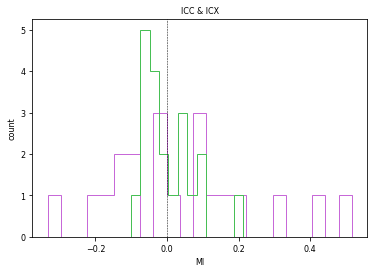

In [53]:
print((df.loc[full_model & is_active & (ICC | ICX) & sig_oubeh, 'MIbeh_only']).median())
print((df.loc[full_model & is_active & (ICC | ICX) & sig_oubeh, 'MIbeh_unique']).median())

plt.hist(df.loc[full_model & is_active & (ICC | ICX) & sig_oubeh, 'MIbeh_only'], color=color_b, bins=23, histtype=u'step')
plt.hist(df.loc[full_model & is_active & (ICC | ICX) & sig_oubeh, 'MIbeh_unique'], color=color_p, bins=12, histtype=u'step')
plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
plt.xlabel('MI')
plt.ylabel('count')
plt.title('ICC & ICX')
#plt.savefig('IC_MIcomp.pdf')

## Figure 3B

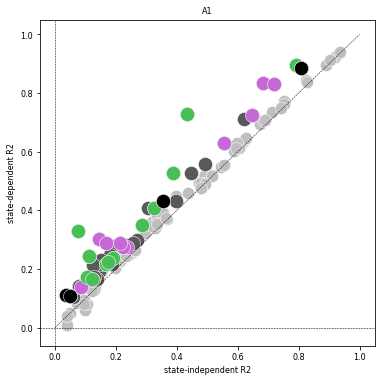

In [55]:
# A1 with colored untis according to model significance
scat_states(x_model=null_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=A1, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup, sig_both], 
            x_column='R2',
            y_column='R2', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            #highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
            save=False,
            xlim=(0,1), 
            ylim=(0,1),
            xlabel='state-independent R2',
            ylabel='state-dependent R2',
            title='A1')

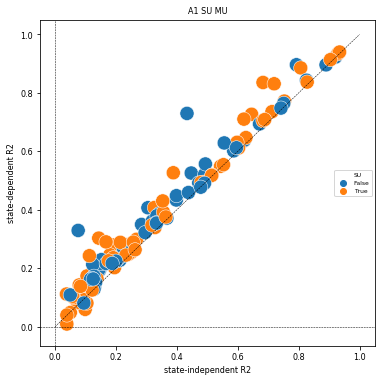

In [32]:
# Not in the figure: A1 SU (blue) and MU (orange)
scat_states(x_model=null_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=A1, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup, sig_both], 
            x_column='R2',
            y_column='R2', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            #highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
            hue='SU',
            save=False,
            xlim=(0,1), 
            ylim=(0,1),
            xlabel='state-independent R2',
            ylabel='state-dependent R2',
            title='A1 SU MU')

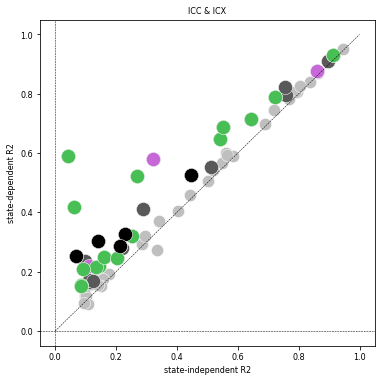

In [36]:
# All IC with colored untis according to model significance
scat_states(x_model=null_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=(ICC | ICX), 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup, sig_both], 
            x_column='R2',
            y_column='R2', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            save=False,
            xlim=(0,1), 
            ylim=(0,1),
            xlabel='state-independent R2',
            ylabel='state-dependent R2',
            title='ICC & ICX')

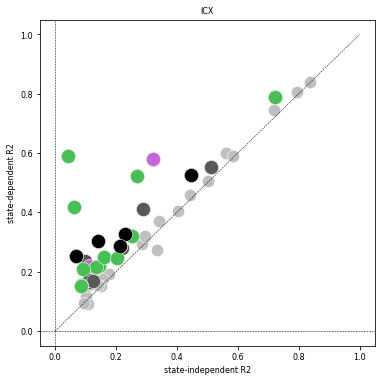

In [38]:
# ICX only
scat_states(x_model=null_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=ICX, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup, sig_both], 
            x_column='R2',
            y_column='R2', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            save=False,
            xlim=(0,1), 
            ylim=(0,1),
            xlabel='state-independent R2',
            ylabel='state-dependent R2',
            title='ICX')

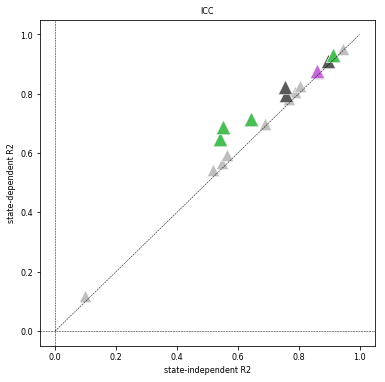

In [39]:
# ICC only
scat_states(x_model=null_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=ICC, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup, sig_both], 
            x_column='R2',
            y_column='R2', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            save=False,
            xlim=(0,1), 
            ylim=(0,1),
            xlabel='state-independent R2',
            ylabel='state-dependent R2',
            title='ICC')

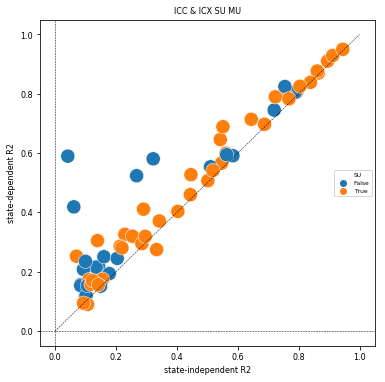

In [37]:
# Not in the figure: IC SU (blue) and MU (orange)
scat_states(x_model=null_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=(ICC | ICX), 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup, sig_both], 
            x_column='R2',
            y_column='R2', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            hue='SU',
            save=False,
            xlim=(0,1), 
            ylim=(0,1),
            xlabel='state-independent R2',
            ylabel='state-dependent R2',
            title='ICC & ICX SU MU')

In [57]:
# getting means for the mean R2_diff across combinations of areas and significant states
print('A1 SU all units: {}'.format((df.loc[full_model & is_active & A1 & SU, 'R2_diff']).mean()))
print('A1 MU all units: {}'.format((df.loc[full_model & is_active & A1 & ~SU, 'R2_diff']).mean()))

print('IC SU all units: {}'.format((df.loc[full_model & is_active & (ICC | ICX) & SU, 'R2_diff']).mean()))
print('IC MU all units: {}'.format((df.loc[full_model & is_active & (ICC | ICX) & ~SU, 'R2_diff']).mean()))

print('A1 SU sig units: {}'.format((df.loc[full_model & is_active & A1 & SU & sig_state, 'R2_diff']).mean()))
print('A1 MU sig units: {}'.format((df.loc[full_model & is_active & A1 & ~SU & ~sig_state, 'R2_diff']).mean()))

print('IC SU sig units: {}'.format((df.loc[full_model & is_active & (ICC | ICX) & SU & sig_state, 'R2_diff']).mean()))
print('IC MU sig units: {}'.format((df.loc[full_model & is_active & (ICC | ICX) & ~SU & ~sig_state, 'R2_diff']).mean()))

A1 SU all units: 0.037350408010654784
A1 MU all units: 0.043259211654652165
IC SU all units: 0.041374110683960096
IC MU all units: 0.10122917238297859
A1 SU sig units: 0.07600666256503634
A1 MU sig units: 0.018362119810687305
IC SU sig units: 0.07723448653587094
IC MU sig units: 0.020873490454991133


In [58]:
# getting medians for the mean R2_diff across combinations of areas and significant states
print('A1 SU all units: {}'.format((df.loc[full_model & is_active & A1 & SU, 'R2_diff']).median()))
print('A1 MU all units: {}'.format((df.loc[full_model & is_active & A1 & ~SU, 'R2_diff']).median()))

print('IC SU all units: {}'.format((df.loc[full_model & is_active & (ICC | ICX) & SU, 'R2_diff']).median()))
print('IC MU all units: {}'.format((df.loc[full_model & is_active & (ICC | ICX) & ~SU, 'R2_diff']).median()))

print('A1 SU sig units: {}'.format((df.loc[full_model & is_active & A1 & SU & sig_state, 'R2_diff']).median()))
print('A1 MU sig units: {}'.format((df.loc[full_model & is_active & A1 & ~SU & ~sig_state, 'R2_diff']).median()))

print('IC SU sig units: {}'.format((df.loc[full_model & is_active & (ICC | ICX) & SU & sig_state, 'R2_diff']).median()))
print('IC MU sig units: {}'.format((df.loc[full_model & is_active & (ICC | ICX) & ~SU & ~sig_state, 'R2_diff']).median()))

A1 SU all units: 0.026035158877129788
A1 MU all units: 0.029170940799387063
IC SU all units: 0.022790541301004663
IC MU all units: 0.06901370606556709
A1 SU sig units: 0.07147098642535761
A1 MU sig units: 0.018694023720988495
IC SU sig units: 0.06627213670533516
IC MU sig units: 0.01808156405874113


In [34]:
# Getting some numbers of cells per area and tuning
print(len(df.loc[full_model & is_active & A1 & onBF]))
print(len(df.loc[full_model & is_active & A1 & offBF]))

print(len(df.loc[full_model & is_active & (ICC | ICX) & onBF]))
print(len(df.loc[full_model & is_active & (ICC | ICX) & offBF]))

49
75
26
40


In [39]:
# scat_states(x_model=full_model, 
#             y_model=full_model, 
#             beh_state=is_active, 
#             area=A1, 
#             sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
#             x_column='MIpup_unique',
#             y_column='MIbeh_unique', 
#             color_list=[color_ns, color_either, color_b, color_p, color_both],
#             #highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
#             save=False,
#             pup_state=is_pupil,
#             xlabel='MI pupil unique (task regressout out)',
#             ylabel='MI task unique (pupil regressed out)',
#             title='A1',
#             xlim=(-0.6,0.6),
#             ylim=(-0.6,0.6))

In [40]:
# scat_states(x_model=full_model, 
#             y_model=full_model, 
#             beh_state=is_active, 
#             area=(ICC | ICX), 
#             sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
#             x_column='MIpup_unique',
#             y_column='MIbeh_unique', 
#             color_list=[color_ns, color_either, color_b, color_p, color_both],
#             #highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
#             save=False,
#             xlabel='MI pupil unique (task regressout out)',
#             ylabel='MI task unique (pupil regressed out)',
#             title='IC',
#             xlim=(-0.2,0.2),
#             ylim=(-0.2,0.2))

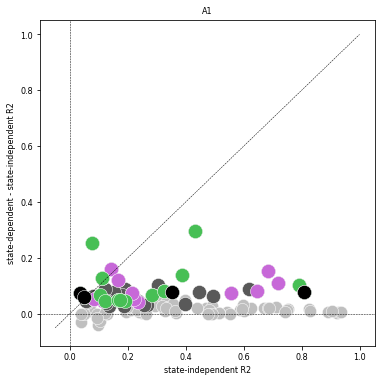

In [40]:
# Not in figure: A1 
scat_states(x_model=null_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=A1, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='R2',
            y_column='R2_diff', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            #highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
            save=False,
            xlabel='state-independent R2',
            ylabel='state-dependent - state-independent R2',
            title='A1',
            xlim=(-0.05,1),
            ylim=(-0.05,1))

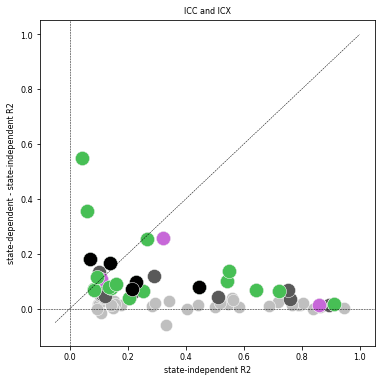

In [41]:
# Not in figure: all IC
scat_states(x_model=null_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=(ICC | ICX), 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup, sig_both], 
            x_column='R2',
            y_column='R2_diff', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            save=False,
            xlabel='state-independent R2',
            ylabel='state-dependent - state-independent R2',
            title='ICC and ICX',
            xlim=(-0.05,1),
            ylim=(-0.05,1))

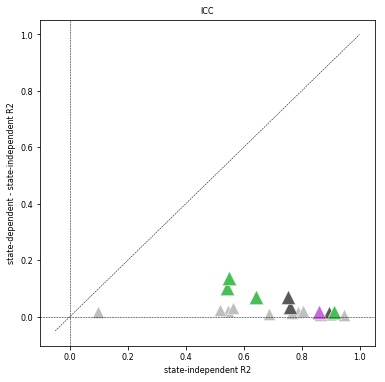

In [43]:
# Not in figure: ICC only 
scat_states(x_model=null_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=ICC, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='R2',
            y_column='R2_diff', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            save=False,
            xlabel='state-independent R2',
            ylabel='state-dependent - state-independent R2',
            title='ICC',
            xlim=(-0.05,1),
            ylim=(-0.05,1))

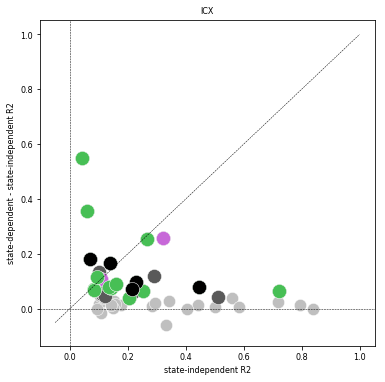

In [44]:
# Not in figure: ICX only
cat_states(x_model=null_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=ICX, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='R2',
            y_column='R2_diff', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            save=False,
            xlabel='state-independent R2',
            ylabel='state-dependent - state-independent R2',
            title='ICX',
            xlim=(-0.05,1),
            ylim=(-0.05,1))

## Figure 4A

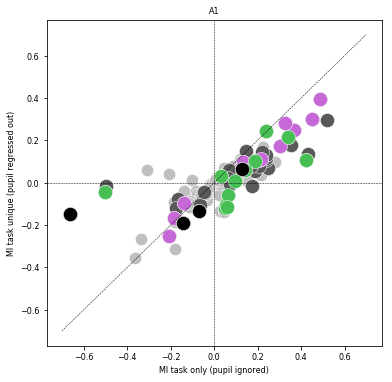

In [45]:
# A1
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=A1, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='MIbeh_only',
            y_column='MIbeh_unique', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            #highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
            save=False,
            xlabel='MI task only (pupil ignored)',
            ylabel='MI task unique (pupil regressed out)',
            title='A1',
            xlim=(-0.7,0.7),
            ylim=(-0.7,0.7))

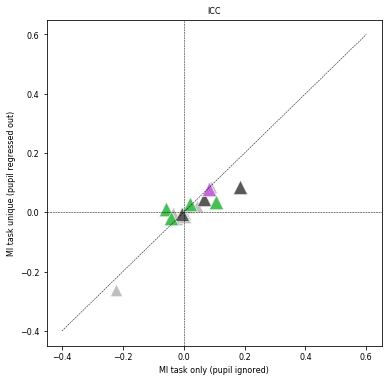

In [46]:
# ICC
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=ICC, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='MIbeh_only',
            y_column='MIbeh_unique', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            #highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
            save=False,
            xlabel='MI task only (pupil ignored)',
            ylabel='MI task unique (pupil regressed out)',
            title='ICC',
            xlim=(-0.4,0.6),
            ylim=(-0.4,0.6))

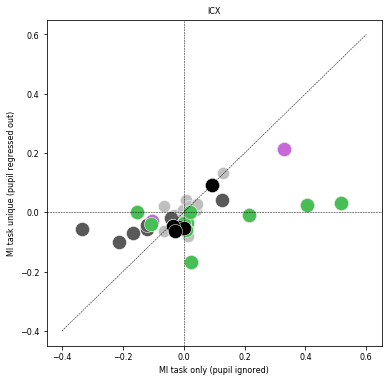

In [47]:
# ICX
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=ICX, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='MIbeh_only',
            y_column='MIbeh_unique', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            #highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
            save=False,
            xlabel='MI task only (pupil ignored)',
            ylabel='MI task unique (pupil regressed out)',
            title='ICX',
            xlim=(-0.4,0.6),
            ylim=(-0.4,0.6))

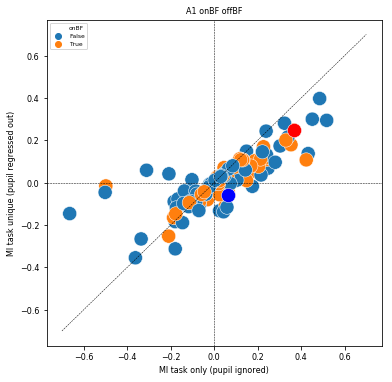

In [48]:
# Not in figure: A1 onBF (orange) and offBF (blue)
# electric blue and red units are example units
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=A1, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='MIbeh_only',
            y_column='MIbeh_unique', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
            hue='onBF',
            save=False,
            xlabel='MI task only (pupil ignored)',
            ylabel='MI task unique (pupil regressed out)',
            title='A1 onBF offBF',
            xlim=(-0.7,0.7),
            ylim=(-0.7,0.7))

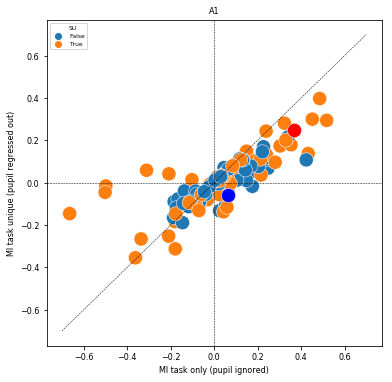

In [49]:
# Not in figure: A1 SU (orange) and MU (blue)
# electric blue and red units are example units
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=A1, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='MIbeh_only',
            y_column='MIbeh_unique', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
            hue='SU',
            save=False,
            xlabel='MI task only (pupil ignored)',
            ylabel='MI task unique (pupil regressed out)',
            title='A1',
            xlim=(-0.7,0.7),
            ylim=(-0.7,0.7))

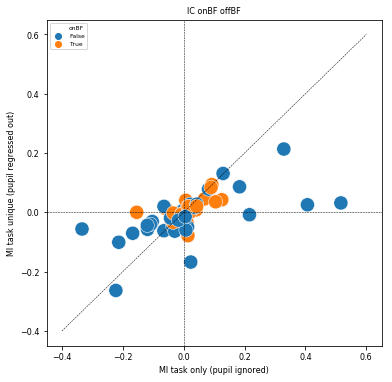

In [50]:
# Not in figure: IC onBF (orange) and ofBF (blue)
# electric blue and red units are example units
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=(ICC | ICX), 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='MIbeh_only',
            y_column='MIbeh_unique', 
            color_list=['#D3D3D3', '#595959', '#82418B', '#2E7E3E', '#000000'],
            hue='onBF',
            save=False,
            xlabel='MI task only (pupil ignored)',
            ylabel='MI task unique (pupil regressed out)',
            title='IC onBF offBF',
            xlim=(-0.4,0.6),
            ylim=(-0.4,0.6))

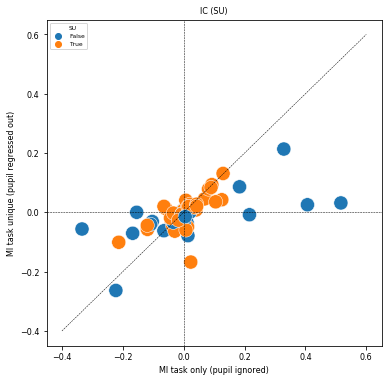

In [51]:
# Not in figure: IC SU (orange) and MU (blue)
# electric blue and red units are example units
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=(ICC | ICX), 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='MIbeh_only',
            y_column='MIbeh_unique', 
            color_list=['#D3D3D3', '#595959', '#82418B', '#2E7E3E', '#000000'],
            hue='SU',
            save=False,
            xlabel='MI task only (pupil ignored)',
            ylabel='MI task unique (pupil regressed out)',
            title='IC (SU)',
            xlim=(-0.4,0.6),
            ylim=(-0.4,0.6))

## Figure 3C

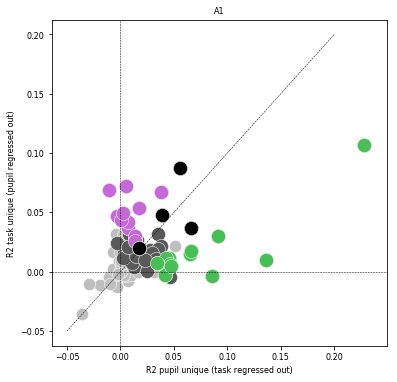

In [52]:
# A1
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=A1, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='R2pup_unique',
            y_column='R2beh_unique', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            #highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
            save=False,
            xlabel='R2 pupil unique (task regressed out)',
            ylabel='R2 task unique (pupil regressed out)',
            title='A1',
            xlim=(-0.05,0.2),
            ylim=(-0.05,0.2))

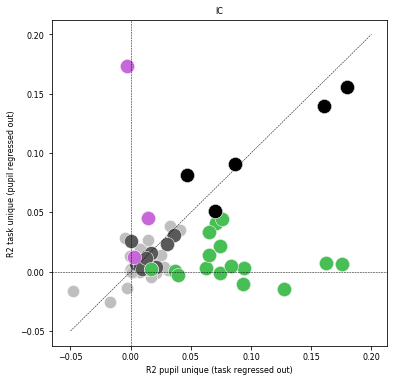

In [53]:
# IC and ICX together
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=(ICC | ICX), 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='R2pup_unique',
            y_column='R2beh_unique', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            save=False,
            xlabel='R2 pupil unique (task regressed out)',
            ylabel='R2 task unique (pupil regressed out)',
            title='IC',
            xlim=(-0.05,0.2),
            ylim=(-0.05,0.2))

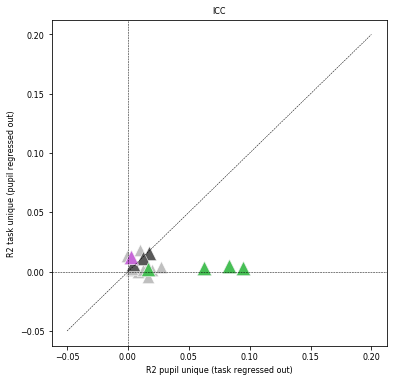

In [54]:
# ICC only
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=ICC, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='R2pup_unique',
            y_column='R2beh_unique', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            save=True,
            xlabel='R2 pupil unique (task regressed out)',
            ylabel='R2 task unique (pupil regressed out)',
            title='ICC',
            xlim=(-0.05,0.2),
            ylim=(-0.05,0.2))

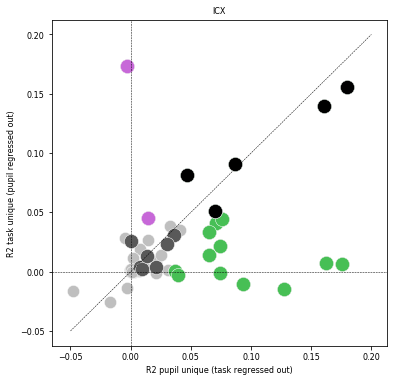

In [55]:
# ICX only
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=ICX, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='R2pup_unique',
            y_column='R2beh_unique', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            save=True,
            xlabel='R2 pupil unique (task regressed out)',
            ylabel='R2 task unique (pupil regressed out)',
            title='ICX',
            xlim=(-0.05,0.2),
            ylim=(-0.05,0.2))

### Below is some code to look at different relationships between area, models, tuning, etc.

0.170926922991 0.0527773374688


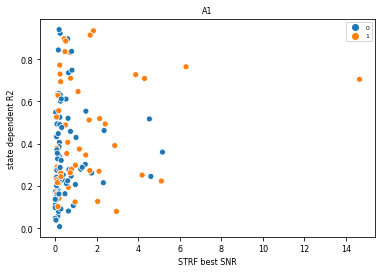

In [57]:
# plot for A1 separating for onBF - full model 
#ax = sns.scatterplot(x='bestsnr', y='R2', hue=df['onBF'], data=df[full_model & is_active & A1])
ax = sns.scatterplot(x='bestsnr', y='R2', hue=df.loc[full_model & is_active & A1,'onBF'].values.astype(int), 
                     data=df[full_model & is_active & A1])
plt.ylabel('state dependent R2')
plt.xlabel('STRF best SNR')
plt.title('A1')
#plt.xlim(0,15)

# quantify correlation between R2 and snr for A1
(cc_A1_full, p_value_A1_full) = sci.stats.pearsonr(df.loc[full_model & is_active & A1, 'bestsnr'], 
                                                   df.loc[full_model & is_active & A1, 'R2'])
print(cc_A1_full, p_value_A1_full)

0.642772996623 5.92776516726e-09


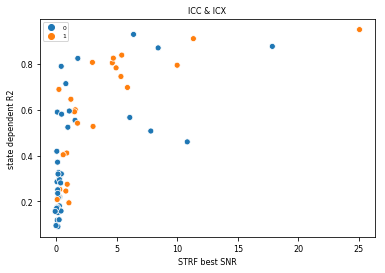

In [58]:
# plot for IC separating for onBF - full model 
#ax = sns.scatterplot(x='bestsnr', y='R2', hue=df['onBF'], data=df[full_model & is_active & IC])
ax = sns.scatterplot(x='bestsnr', y='R2', hue=df.loc[full_model & is_active & (ICC | ICX),'onBF'].values.astype(int), 
                     data=df[full_model & is_active & (ICC | ICX)])
plt.ylabel('state dependent R2')
plt.xlabel('STRF best SNR')
plt.title('ICC & ICX')

# quantify correlation between R2 and snr for IC - full model
(cc_IC_full, p_value_IC_full) = sci.stats.pearsonr(df.loc[full_model & is_active & (ICC | ICX), 'bestsnr'], 
                                                   df.loc[full_model & is_active & (ICC | ICX), 'R2'])
print(cc_IC_full, p_value_IC_full)

0.514047890709 0.000186065588766


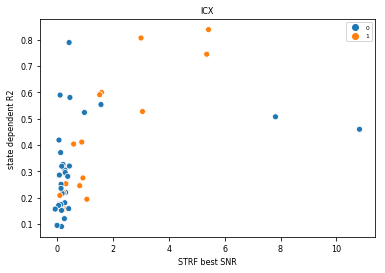

In [59]:
# plot for IC separating for onBF - full model 
#ax = sns.scatterplot(x='bestsnr', y='R2', hue=df['onBF'], data=df[full_model & is_active & IC])
ax = sns.scatterplot(x='bestsnr', y='R2', hue=df.loc[full_model & is_active & ICX,'onBF'].values.astype(int), 
                     data=df[full_model & is_active & ICX])
plt.ylabel('state dependent R2')
plt.xlabel('STRF best SNR')
plt.title('ICX')

# quantify correlation between R2 and snr for IC - full model
(cc_ICX_full, p_value_ICX_full) = sci.stats.pearsonr(df.loc[full_model & is_active & ICX, 'bestsnr'], 
                                                   df.loc[full_model & is_active & ICX, 'R2'])
print(cc_ICX_full, p_value_ICX_full)

0.189301849293 0.0316665198015


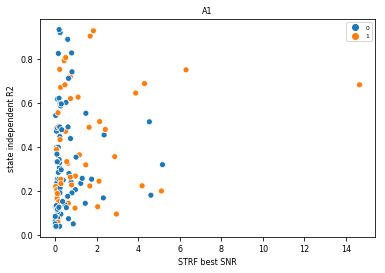

In [60]:
# plot for A1 separating for onBF - null model
#ax = sns.scatterplot(x='bestsnr', y='R2', hue=df['onBF'], data=df[null_model & is_active & A1])
ax = sns.scatterplot(x='bestsnr', y='R2', hue=df.loc[null_model & is_active & A1,'onBF'].values.astype(int), 
                     data=df[null_model & is_active & A1])
plt.ylabel('state independent R2')
plt.xlabel('STRF best SNR')
plt.title('A1')
#plt.xlim(0,15)

# quantify correlation between R2 and snr for A1 - full model
(cc_A1_null, p_value_A1_null) = sci.stats.pearsonr(df.loc[null_model & is_active & A1, 'bestsnr'], 
                                                   df.loc[null_model & is_active & A1, 'R2'])
print(cc_A1_null, p_value_A1_null)

0.641879673168 0.00408162261118


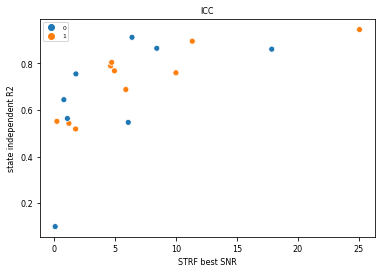

In [61]:
# plot for IC separating for onBF - null model 
#ax = sns.scatterplot(x='bestsnr', y='R2', hue=df['onBF'], data=df[null_model & is_active & IC])
ax = sns.scatterplot(x='bestsnr', y='R2', hue=df.loc[null_model & is_active & ICC,'onBF'].values.astype(int), 
                     data=df[null_model & is_active & ICC])
plt.ylabel('state independent R2')
plt.xlabel('STRF best SNR')
plt.title('ICC')

# quantify correlation between R2 and snr for IC - null model
(cc_ICC_null, p_value_ICC_null) = sci.stats.pearsonr(df.loc[null_model & is_active & ICC, 'bestsnr'], 
                                                   df.loc[null_model & is_active & ICC, 'R2'])
print(cc_ICC_null, p_value_ICC_null)

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


-0.092551370419 0.296859898786


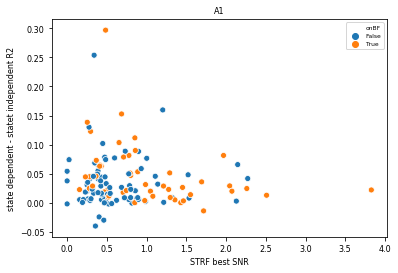

In [62]:
# plot snr vs R2 diff for A1
ax = sns.scatterplot(x=np.sqrt(df.loc[full_model & is_active & A1, 'bestsnr']), 
                     y=df.loc[full_model & is_active & A1, 'R2_diff'],
                     hue=df.loc[full_model & is_active & A1, 'onBF'])
plt.ylabel('state dependent - statet independent R2')
plt.xlabel('STRF best SNR')
plt.title('A1')

# verify if correlation is significant
(cc_R2STRF_A1, p_R2STRF_A1) = sci.stats.pearsonr(df.loc[full_model & is_active & A1, 'bestsnr'],
                                                 df.loc[full_model & is_active & A1, 'R2_diff'])
print(cc_R2STRF_A1, p_R2STRF_A1)

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


-0.157728218246 0.0276513764442


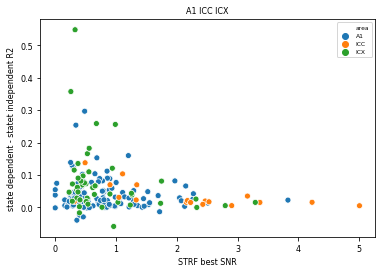

In [63]:
# plot snr vs R2 diff for IC
ax = sns.scatterplot(x=np.sqrt(df.loc[full_model & is_active, 'bestsnr']), 
                     y=df.loc[full_model & is_active, 'R2_diff'],
                     hue=df.loc[full_model & is_active, 'area'])
plt.ylabel('state dependent - statet independent R2')
plt.xlabel('STRF best SNR')
plt.title('A1 ICC ICX')
plt.savefig('DeltaR2_STRF.pdf')

# verify if correlation is significant
(cc_R2STRF, p_R2STRF) = sci.stats.pearsonr(df.loc[full_model & is_active, 'bestsnr'],
                                                 df.loc[full_model & is_active, 'R2_diff'])
print(cc_R2STRF, p_R2STRF)

/Applications/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


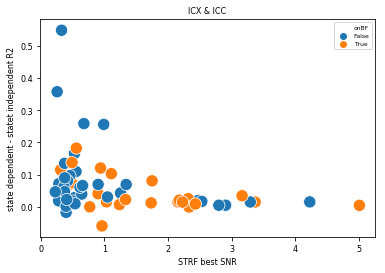

In [64]:
# plot snr vs R2 diff for IC
ax = sns.scatterplot(x=np.sqrt(df.loc[full_model & is_active & (ICC | ICX), 'bestsnr']), 
                     y=df.loc[full_model & is_active & (ICC | ICX), 'R2_diff'],
                     hue=df.loc[full_model & is_active & (ICC | ICX), 'onBF'], s = 150)

plt.ylabel('state dependent - statet independent R2')
plt.xlabel('STRF best SNR')
plt.title('ICX & ICC')
plt.savefig('DeltaR2_STRF.pdf')

# verify if correlation is significant
#(cc_R2STRF_ICX, p_R2STRF_ICX) = sci.stats.pearsonr(np.sqrt(abs(df.loc[full_model & is_active & ICX, 'bestsnr'])),
#                                                 df.loc[full_model & is_active & ICX, 'R2_diff'])
#print(cc_R2STRF_ICX, p_R2STRF_ICX)

-0.0842459254598 0.342506097594


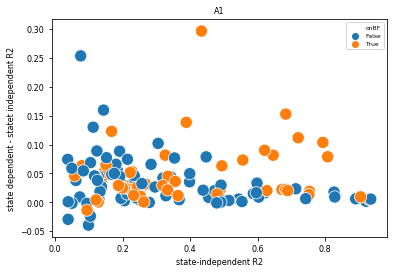

In [65]:
# plot and calculate correlation between state-dependent R2 and state-independent R2 In A1 and IC
ax = sns.scatterplot(x=df.loc[null_model & is_active & A1, 'R2'].tolist(), 
                     y=df.loc[full_model & is_active & A1, 'R2_diff'].tolist(),
                     hue=df.loc[full_model & is_active & A1, 'onBF'], s = 150)
plt.ylabel('state dependent - statet independent R2')
plt.xlabel('state-independent R2')
plt.title('A1')
#plt.savefig('R2_state_dep_indep_scatter_A1.pdf')

# verify if correlation is significant
(cc_R2_A1, p_R2_A1) = sci.stats.pearsonr(df.loc[null_model & is_active & A1, 'R2'].tolist(),
                                         df.loc[full_model & is_active & A1, 'R2_diff'].tolist())
print(cc_R2_A1, p_R2_A1)

-0.344065833692 0.00467352208479


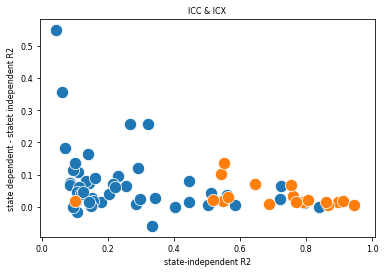

In [66]:
# plot and calculate correlation between state-dependent R2 and state-independent R2 In A1 and ICC
ax = sns.scatterplot(x=df.loc[null_model & is_active & ICX, 'R2'].tolist(), 
                     y=df.loc[full_model & is_active & ICX, 'R2_diff'].tolist(), s = 150)
ax = sns.scatterplot(x=df.loc[null_model & is_active & ICC, 'R2'].tolist(), 
                     y=df.loc[full_model & is_active & ICC, 'R2_diff'].tolist(), s = 150)
plt.ylabel('state dependent - statet independent R2')
plt.xlabel('state-independent R2')
plt.title('ICC & ICX')
plt.savefig('DeltaR2_R2ind_IC.pdf')

#verify if correlation is significant
(cc_R2_IC, p_R2_IC) = sci.stats.pearsonr(df.loc[null_model & is_active & (ICC | ICX), 'R2'].tolist(),
                                          df.loc[full_model & is_active & (ICC | ICX), 'R2_diff'].tolist())
print(cc_R2_IC, p_R2_IC)

In [67]:
print(df.loc[null_model & is_active & ICX, 'R2'].median())
print(df.loc[null_model & is_active & ICC, 'R2'].median())
print(df.loc[full_model & is_active & ICX, 'R2_diff'].median())
print(df.loc[full_model & is_active & ICC, 'R2_diff'].median())

0.16898138259004464
0.7571516602612043
0.047068928876634705
0.01881035198634389


-0.309217293067 0.0324707457338


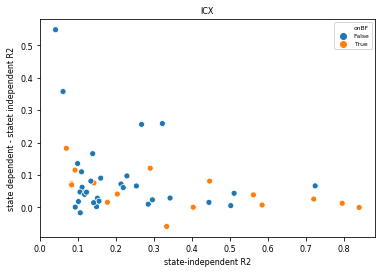

In [68]:
# plot and calculate correlation between state-dependent R2 and state-independent R2 In A1 and ICX
ax = sns.scatterplot(x=df.loc[null_model & is_active & ICX, 'R2'].tolist(), 
                     y=df.loc[full_model & is_active & ICX, 'R2_diff'].tolist(),
                     hue=df.loc[full_model & is_active & ICX, 'onBF'])
plt.ylabel('state dependent - statet independent R2')
plt.xlabel('state-independent R2')
plt.title('ICX')
#plt.savefig('R2_state_dep_indep_scatter_ICX.pdf')

# verify if correlation is significant
(cc_R2_ICX, p_R2_ICX) = sci.stats.pearsonr(df.loc[null_model & is_active & ICX, 'R2'].tolist(),
                                         df.loc[full_model & is_active & ICX, 'R2_diff'].tolist())
print(cc_R2_ICX, p_R2_ICX)

In [69]:
len(df.loc[null_model & is_active & A1, 'R2'])

129

In [70]:
# x_A1=df.loc[null_model & is_active & A1, 'R2']
# y_A1=df.loc[full_model & is_active & A1, 'R2_diff']
# plt.scatter(x_A1,y_A1)
# plt.ylabel('state dependent - statet independent R2')
# plt.xlabel('state-independent R2')
# plt.title('A1')
# # verify if correlation is significant
# (cc_R2_A1, p_R2_A1) = sci.stats.pearsonr(x_A1, y_A1)
# print(cc_R2_A1, p_R2_A1)

In [71]:
# x_IC=df.loc[null_model & is_active & IC, 'R2']
# y_IC=df.loc[full_model & is_active & IC, 'R2_diff']
# plt.scatter(x_IC,y_IC)
# plt.ylabel('state dependent - statet independent R2')
# plt.xlabel('state-independent R2')
# plt.title('IC')
# # verify if correlation is significant
# (cc_R2_IC, p_R2_A1) = sci.stats.pearsonr(x_IC, y_IC)
# print(cc_R2_IC, p_R2_A1)

### Get numbers of units per condition and some stats on.

In [61]:
# total number of A1 units
print(len(df[full_model & is_active & A1]))
# SU
print(len(df[full_model & is_active & A1 & SU]))
# MU
print(len((df[full_model & is_active & A1]))-len(df[full_model & is_active & A1 & SU]))

124
68
56


In [62]:
# total number of ICC units
print(len(df[full_model & is_active & ICC]))
# SU
print(len(df[full_model & is_active & ICC & SU]))
# MU
print(len((df[full_model & is_active & ICC]))-len(df[full_model & is_active & ICC & SU]))

18
14
4


In [63]:
# total number of ICX units
print(len(df[full_model & is_active & ICX]))
# SU
print(len(df[full_model & is_active & ICX & SU]))
# MU
print(len((df[full_model & is_active & ICX]))-len(df[full_model & is_active & ICX & SU]))

48
27
21


In [64]:
# sort based on MI
df_MI_unique_sorted = df.sort_values('MIbeh_unique')
df_MI_only_sorted = df.sort_values('MIbeh_only')

In [65]:
# count positive and negative values of MI in A1 and IC
print("# A1 positive MIunique is: {}.".format(len(df[full_model & is_active & A1 & (df['MIbeh_unique']>0.0)])))
print("# A1 positive MIonly is: {}.".format(len(df[full_model & is_active & A1 & (df['MIbeh_only']>0.0)])))
print("# IC positive MIunique is: {}.".format(len(df[full_model & is_active & (ICC | ICX) & (df['MIbeh_unique']>0.0)])))
print("# IC positive MIonly is: {}.".format(len(df[full_model & is_active & (ICC | ICX) & (df['MIbeh_only']>0.0)])))

print("# A1 negative MIunique is: {}.".format(len(df[full_model & is_active & A1 & (df['MIbeh_unique']<0.0)])))
print("# A1 negative MIonly is: {}.".format(len(df[full_model & is_active & A1 & (df['MIbeh_only']<0.0)])))
print("# IC negative MIunique is: {}.".format(len(df[full_model & is_active & (ICC | ICX) & (df['MIbeh_unique']<0.0)])))
print("# IC negative MIonly is: {}.".format(len(df[full_model & is_active & (ICC | ICX) & (df['MIbeh_only']<0.0)])))

# A1 positive MIunique is: 73.
# A1 positive MIonly is: 83.
# IC positive MIunique is: 26.
# IC positive MIonly is: 32.
# A1 negative MIunique is: 51.
# A1 negative MIonly is: 41.
# IC negative MIunique is: 40.
# IC negative MIonly is: 34.


In [66]:
# Median all units
median_MI_only_A1 = (df.loc[full_model & is_active & A1, 'MIbeh_only']).median()
print(median_MI_only_A1)

median_MI_unique_A1 = (df.loc[full_model & is_active & A1, 'MIbeh_unique']).median()
print(median_MI_unique_A1)

median_MI_only_IC = (df.loc[full_model & is_active & (ICC | ICX), 'MIbeh_only']).median()
print(median_MI_only_IC)

median_MI_unique_IC = (df.loc[full_model & is_active & (ICC | ICX), 'MIbeh_unique']).median()
print(median_MI_unique_IC)

0.048292149616244964
0.012717363496343979
-0.002356046458243305
-0.00807015071429156


In [67]:
print(sci.wilcoxon((df.loc[full_model & is_active & A1, 'MIbeh_only']), zero_method='pratt'))
print(sci.wilcoxon((df.loc[full_model & is_active & A1, 'MIbeh_unique']), zero_method='pratt'))

print(sci.wilcoxon((df.loc[full_model & is_active & (ICC | ICX), 'MIbeh_only']), zero_method='pratt'))
print(sci.wilcoxon((df.loc[full_model & is_active & (ICC | ICX), 'MIbeh_unique']), zero_method='pratt'))

WilcoxonResult(statistic=2586.0, pvalue=0.0013074070387686357)
WilcoxonResult(statistic=3283.0, pvalue=0.13987506338565098)
WilcoxonResult(statistic=1054.0, pvalue=0.74216613062659431)
WilcoxonResult(statistic=823.0, pvalue=0.071132137918384561)


In [68]:
# count positive and negative values of MI in A1 and IC sign state modulated cells only
print("# A1 positive MIunique is: {}.".format(len(df[full_model & is_active & A1 & sig_state & (df['MIbeh_unique']>0.0)])))
print("# A1 positive MIonly is: {}.".format(len(df[full_model & is_active & A1 & sig_state & (df['MIbeh_only']>0.0)])))
print("# A1 negative MIunique is: {}.".format(len(df[full_model & is_active & A1 & sig_state & (df['MIbeh_unique']<0.0)])))
print("# A1 negative MIonly is: {}.".format(len(df[full_model & is_active & A1 & sig_state & (df['MIbeh_only']<0.0)])))

print("# IC positive MIunique is: {}.".format(len(df[full_model & is_active & (ICC | ICX) & sig_state & (df['MIbeh_unique']>0.0)])))
print("# IC positive MIonly is: {}.".format(len(df[full_model & is_active & (ICC | ICX) & sig_state & (df['MIbeh_only']>0.0)])))
print("# IC negative MIunique is: {}.".format(len(df[full_model & is_active & (ICC | ICX) & sig_state & (df['MIbeh_unique']<0.0)])))
print("# IC negative MIonly is: {}.".format(len(df[full_model & is_active & (ICC | ICX) & sig_state & (df['MIbeh_only']<0.0)])))

# A1 positive MIunique is: 33.
# A1 positive MIonly is: 39.
# A1 negative MIunique is: 18.
# A1 negative MIonly is: 12.
# IC positive MIunique is: 13.
# IC positive MIonly is: 18.
# IC negative MIunique is: 21.
# IC negative MIonly is: 16.


In [69]:
# count positive and negative values of MI in A1 and IC sign of beh only or unique modulated cells
print("# A1 positive MIunique is: {}.".format(len(df[full_model & is_active & A1 & sig_oubeh & (df['MIbeh_unique']>0.0)])))
print("# A1 positive MIonly is: {}.".format(len(df[full_model & is_active & A1 & sig_oubeh & (df['MIbeh_only']>0.0)])))
print("# A1 negative MIunique is: {}.".format(len(df[full_model & is_active & A1 & sig_oubeh & (df['MIbeh_unique']<0.0)])))
print("# A1 negative MIonly is: {}.".format(len(df[full_model & is_active & A1 & sig_oubeh & (df['MIbeh_only']<0.0)])))

print("# IC positive MIunique is: {}.".format(len(df[full_model & is_active & (ICC | ICX) & sig_oubeh & (df['MIbeh_unique']>0.0)])))
print("# IC positive MIonly is: {}.".format(len(df[full_model & is_active & (ICC | ICX) & sig_oubeh & (df['MIbeh_only']>0.0)])))
print("# IC negative MIunique is: {}.".format(len(df[full_model & is_active & (ICC | ICX) & sig_oubeh & (df['MIbeh_unique']<0.0)])))
print("# IC negative MIonly is: {}.".format(len(df[full_model & is_active & (ICC | ICX) & sig_oubeh & (df['MIbeh_only']<0.0)])))

# A1 positive MIunique is: 24.
# A1 positive MIonly is: 24.
# A1 negative MIunique is: 7.
# A1 negative MIonly is: 7.
# IC positive MIunique is: 9.
# IC positive MIonly is: 10.
# IC negative MIunique is: 11.
# IC negative MIonly is: 10.


In [70]:
mean_MI_only_A1 = abs((df_MI_only_sorted.loc[full_model & is_active & A1, 'MIbeh_only'])).mean()
print(mean_MI_only_A1)

mean_MI_unique_A1 = abs((df_MI_unique_sorted.loc[full_model & is_active & A1, 'MIbeh_unique'])).mean()
print(mean_MI_unique_A1)

mean_MI_only_ICC = abs((df_MI_only_sorted.loc[full_model & is_active & ICC, 'MIbeh_only'])).mean()
print(mean_MI_only_ICC)

mean_MI_unique_ICC = abs((df_MI_unique_sorted.loc[full_model & is_active & ICC, 'MIbeh_unique'])).mean()
print(mean_MI_unique_ICC)

mean_MI_only_ICX = abs((df_MI_only_sorted.loc[full_model & is_active & ICX, 'MIbeh_only'])).mean()
print(mean_MI_only_ICX)

mean_MI_unique_ICX = abs((df_MI_unique_sorted.loc[full_model & is_active & ICX, 'MIbeh_unique'])).mean()
print(mean_MI_unique_ICX)

0.14755081153439073
0.09089647842331725
0.05629140508907174
0.04177611806092438
0.0809387552202682
0.04377380512105402


In [71]:
median_MI_only_A1 = abs((df_MI_only_sorted.loc[full_model & is_active & A1, 'MIbeh_only'])).median()
print(median_MI_only_A1)

median_MI_unique_A1 = abs((df_MI_unique_sorted.loc[full_model & is_active & A1, 'MIbeh_unique'])).median()
print(median_MI_unique_A1)

median_MI_only_ICC = abs((df_MI_only_sorted.loc[full_model & is_active & ICC, 'MIbeh_only'])).median()
print(median_MI_only_ICC)

median_MI_unique_ICC = abs((df_MI_unique_sorted.loc[full_model & is_active & ICC, 'MIbeh_unique'])).median()
print(median_MI_unique_ICC)

median_MI_only_ICX = abs((df_MI_only_sorted.loc[full_model & is_active & ICX, 'MIbeh_only'])).median()
print(median_MI_only_ICX)

median_MI_unique_ICX = abs((df_MI_unique_sorted.loc[full_model & is_active & ICX, 'MIbeh_unique'])).median()
print(median_MI_unique_ICX)

0.1156300254562112
0.0721157114910908
0.038308287944711195
0.01999789100298674
0.035653601508197866
0.03432743223919707


In [72]:
# Median only state-significant units

median_MI_only_A1_sig = (df_MI_only_sorted.loc[full_model & is_active & A1 & sig_state, 'MIbeh_only']).median()
print(median_MI_only_A1_sig)

median_MI_unique_A1_sig = (df_MI_unique_sorted.loc[full_model & is_active & A1 & sig_state, 'MIbeh_unique']).median()
print(median_MI_unique_A1_sig)

median_MI_only_IC_sig = (df_MI_only_sorted.loc[full_model & is_active & (ICC | ICX) & sig_state, 'MIbeh_only']).median()
print(median_MI_only_IC_sig)

median_MI_unique_IC_sig = (df_MI_unique_sorted.loc[full_model & is_active & (ICC | ICX) & sig_state, 'MIbeh_unique']).median()
print(median_MI_unique_IC_sig)


# mean_MI_only_ICC = (df_MI_only_sorted.loc[full_model & is_active & ICC, 'MIbeh_only']).mean()
# print(mean_MI_only_ICC)

# mean_MI_unique_ICC = (df_MI_unique_sorted.loc[full_model & is_active & ICC, 'MIbeh_unique']).mean()
# print(mean_MI_unique_ICC)

# mean_MI_only_ICX = (df_MI_only_sorted.loc[full_model & is_active & ICX, 'MIbeh_only']).mean()
# print(mean_MI_only_ICX)

# mean_MI_unique_ICX = (df_MI_unique_sorted.loc[full_model & is_active & ICX, 'MIbeh_unique']).mean()
# print(mean_MI_unique_ICX)

0.14537411909894746
0.06857336997365991
0.0011472415130096458
-0.024881025647044


In [73]:
# note that it does not matter if choose full_model, null_model, part_beh_model, part_pup_model as they all have same length 
x_axis_A1 = list(range(len(df[full_model & is_active & A1])))
# x_axis_ICC = list(range(len(df[full_model & is_active & ICC])))
# x_axis_ICX = list(range(len(df[full_model & is_active & ICX])))
x_axis_IC = list(range(len(df[full_model & is_active & (ICC | ICX)])))

In [74]:
print(len(x_axis_A1))
print(len(x_axis_IC))

124
66


## Figure 4B

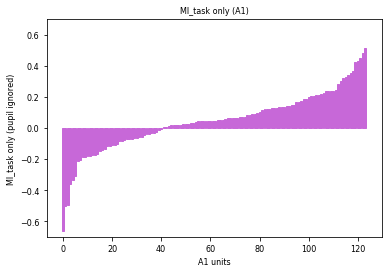

In [75]:
plt.figure()
plt.bar(x_axis_A1, df_MI_only_sorted.loc[full_model & is_active & A1, 'MIbeh_only'], color = color_b, edgecolor = color_b) 
plt.ylim((-0.7,0.7))
plt.xlabel('A1 units')
plt.ylabel('MI_task only (pupil ignored)')
plt.title('MI_task only (A1)')
#plt.savefig('MI_task_only_A1.pdf')

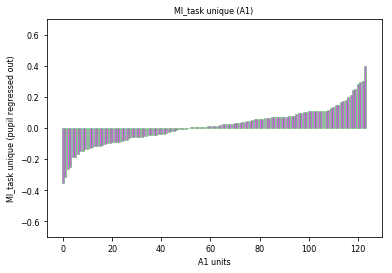

In [76]:
plt.figure()
plt.bar(x_axis_A1, df_MI_unique_sorted.loc[full_model & is_active & A1, 'MIbeh_unique'], color = color_b, 
        edgecolor = color_p, linewidth=0.5) 
plt.ylim((-0.7,0.7))
plt.xlabel('A1 units')
plt.ylabel('MI_task unique (pupil regressed out)')
plt.title('MI_task unique (A1)')
#plt.savefig('MI_task_unique_A1.pdf')

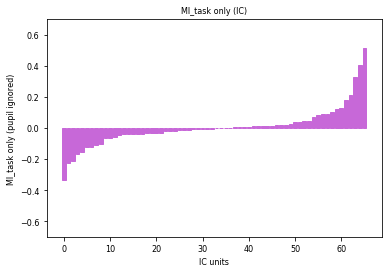

In [77]:
plt.figure()
plt.bar(x_axis_IC, df_MI_only_sorted.loc[full_model & is_active & (ICC | ICX), 'MIbeh_only'], color = color_b, edgecolor = color_b) 
plt.ylim((-0.7,0.7))
plt.xlabel('IC units')
plt.ylabel('MI_task only (pupil ignored)')
plt.title('MI_task only (IC)')
#plt.savefig('MI_task_only_IC.pdf')

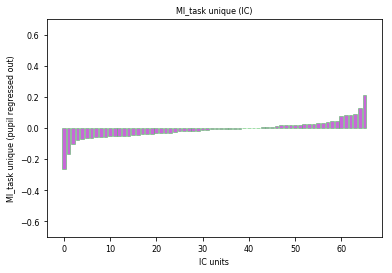

In [78]:
plt.figure()
plt.bar(x_axis_IC, df_MI_unique_sorted.loc[full_model & is_active & (ICC | ICX), 'MIbeh_unique'], color = color_b, 
        edgecolor = color_p, linewidth=0.5) 
plt.ylim((-0.7,0.7))
plt.xlabel('IC units')
plt.ylabel('MI_task unique (pupil regressed out)')
plt.title('MI_task unique (IC)')
#plt.savefig('MI_task_unique_IC.pdf')

In [79]:
# To quantify differences in modulation without the confounding element of sign let's do 
# (MItask only - MItask unique) * sign((MItask only+MItask unique)/2)
# and calculate how much that differs from zero

# A1

sign_A1 = np.sign((df.loc[full_model & is_active & A1, 'MIbeh_unique']+
                           df.loc[full_model & is_active & A1,'MIbeh_only'])/2)

signed_diff_A1 = (df.loc[full_model & is_active & A1, 'MIbeh_only']
                  -df.loc[full_model & is_active & A1, 'MIbeh_unique']) * sign_A1


signed_only_A1 = df.loc[full_model & is_active & A1, 'MIbeh_only'] * sign_A1

signed_unique_A1 = df.loc[full_model & is_active & A1, 'MIbeh_unique'] * sign_A1

diff_A1 = (df.loc[full_model & is_active & A1, 'MIbeh_only']
                  -df.loc[full_model & is_active & A1, 'MIbeh_unique'])

diff_A1_sig_state = (df.loc[full_model & is_active & A1 & sig_state, 'MIbeh_only']
                  -df.loc[full_model & is_active & A1 & sig_state, 'MIbeh_unique'])

# A1 onBF
signed_diff_A1_onBF = (df.loc[full_model & is_active & A1 & onBF, 
                  'MIbeh_only']-df.loc[full_model & is_active & A1 & onBF, 
                                         'MIbeh_unique']) * np.sign((df.loc[full_model & is_active & A1 & onBF, 
                                                                          'MIbeh_unique']+df.loc[full_model & is_active & A1 & onBF, 
                                                                                                 'MIbeh_only'])/2)

# A1 offBF
signed_diff_A1_offBF = (df.loc[full_model & is_active & A1 & offBF, 
                  'MIbeh_only']-df.loc[full_model & is_active & A1 & offBF, 
                                         'MIbeh_unique']) * np.sign((df.loc[full_model & is_active & A1 & offBF, 
                                                                          'MIbeh_unique']+df.loc[full_model & is_active & A1 & offBF, 
                                                                                                 'MIbeh_only'])/2)

# A1 SU
signed_diff_A1_SU = (df.loc[full_model & is_active & A1 & SU, 
                  'MIbeh_only']-df.loc[full_model & is_active & A1 & SU, 
                                         'MIbeh_unique']) * np.sign((df.loc[full_model & is_active & A1 & SU, 
                                                                          'MIbeh_unique']+df.loc[full_model & is_active & A1 & SU, 
                                                                                                 'MIbeh_only'])/2)

# A1 MU
signed_diff_A1_MU = (df.loc[full_model & is_active & A1 & ~SU, 
                  'MIbeh_only']-df.loc[full_model & is_active & A1 & ~SU, 
                                         'MIbeh_unique']) * np.sign((df.loc[full_model & is_active & A1 & ~SU, 
                                                                          'MIbeh_unique']+df.loc[full_model & is_active & A1 & ~SU, 
                                                                                                 'MIbeh_only'])/2)

######################
# IC all

sign_IC = np.sign((df.loc[full_model & is_active & (ICC | ICX), 'MIbeh_unique']+
                           df.loc[full_model & is_active & (ICC | ICX),'MIbeh_only'])/2)

signed_diff_IC = (df.loc[full_model & is_active & (ICC | ICX), 'MIbeh_only']
                  -df.loc[full_model & is_active & (ICC | ICX), 'MIbeh_unique']) * sign_IC


signed_only_IC = df.loc[full_model & is_active & (ICC | ICX), 'MIbeh_only'] * sign_IC

signed_unique_IC = df.loc[full_model & is_active & (ICC | ICX), 'MIbeh_unique'] * sign_IC

diff_IC = (df.loc[full_model & is_active & (ICC | ICX), 'MIbeh_only']
                  -df.loc[full_model & is_active & (ICC | ICX), 'MIbeh_unique']) 

diff_IC_sig_state = (df.loc[full_model & is_active & (ICC | ICX) & sig_state, 'MIbeh_only']
                  -df.loc[full_model & is_active & (ICC | ICX) & sig_state, 'MIbeh_unique']) 



# IC onBF
signed_diff_IC_onBF = (df.loc[full_model & is_active & (ICC | ICX) & onBF, 
                  'MIbeh_only']-df.loc[full_model & is_active & (ICC | ICX) & onBF, 
                                         'MIbeh_unique']) * np.sign((df.loc[full_model & is_active & (ICC | ICX) & onBF, 
                                                                          'MIbeh_unique']+df.loc[full_model & is_active & (ICC | ICX) & onBF, 
                                                                                                 'MIbeh_only'])/2)

# IC onBF
signed_diff_IC_offBF = (df.loc[full_model & is_active & (ICC | ICX) & offBF, 
                  'MIbeh_only']-df.loc[full_model & is_active & (ICC | ICX) & offBF, 
                                         'MIbeh_unique']) * np.sign((df.loc[full_model & is_active & (ICC | ICX) & offBF, 
                                                                          'MIbeh_unique']+df.loc[full_model & is_active & (ICC | ICX) & offBF, 
                                                                                                 'MIbeh_only'])/2)


# ICC
signed_diff_ICC = (df.loc[full_model & is_active & ICC, 
                  'MIbeh_only']-df.loc[full_model & is_active & ICC, 
                                         'MIbeh_unique']) * np.sign((df.loc[full_model & is_active & ICC, 
                                                                          'MIbeh_unique']+df.loc[full_model & is_active & ICC, 
                                                                                                 'MIbeh_only'])/2)

# ICX
signed_diff_ICX = (df.loc[full_model & is_active & ICX, 
                  'MIbeh_only']-df.loc[full_model & is_active & ICX, 
                                         'MIbeh_unique']) * np.sign((df.loc[full_model & is_active & ICX, 
                                                                          'MIbeh_unique']+df.loc[full_model & is_active & ICX, 
                                                                                                 'MIbeh_only'])/2)


# A1 SU
signed_diff_IC_SU = (df.loc[full_model & is_active & (ICC | ICX)  & SU, 
                  'MIbeh_only']-df.loc[full_model & is_active & (ICC | ICX)  & SU, 
                                         'MIbeh_unique']) * np.sign((df.loc[full_model & is_active & (ICC | ICX)  & SU, 
                                                                          'MIbeh_unique']+df.loc[full_model & is_active & (ICC | ICX)  & SU, 
                                                                                                 'MIbeh_only'])/2)

# A1 MU
signed_diff_IC_MU = (df.loc[full_model & is_active & (ICC | ICX)  & ~SU, 
                  'MIbeh_only']-df.loc[full_model & is_active & (ICC | ICX)  & ~SU, 
                                         'MIbeh_unique']) * np.sign((df.loc[full_model & is_active & (ICC | ICX)  & ~SU, 
                                                                          'MIbeh_unique']+df.loc[full_model & is_active & (ICC | ICX)  & ~SU, 
                                                                                                 'MIbeh_only'])/2)


In [80]:
print(signed_diff_A1.mean())
print(signed_diff_IC.mean())

print(signed_only_A1.mean())
print(signed_unique_A1.mean())

print(signed_only_IC.mean())
print(signed_unique_IC.mean())

ratio_A1 = (signed_unique_A1 / signed_only_A1).median()
ratio_IC = (signed_unique_IC / signed_only_IC).median()

print(ratio_A1)
print(ratio_IC)

print(diff_A1.median())
print(diff_IC.median())

print(diff_A1_sig_state.median())
print(diff_IC_sig_state.median())

0.056983466793970504
0.029558333462108326
0.14346505524449493
0.08648158845052449
0.07153602624134832
0.04197769277923999
0.5709610989244585
0.4471552058944533
0.028298426996831216
0.0029904630465332534
0.08413967269282052
0.021464397907601827


In [81]:
print(signed_only_A1.mean())
print(signed_unique_A1.mean())

print(signed_only_IC.mean())
print(signed_unique_IC.mean())

0.14346505524449493
0.08648158845052449
0.07153602624134832
0.04197769277923999


The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

Parameters:

**x** : array_like  
The first set of measurements.

**y** : array_like, optional  
The second set of measurements. If y is not given, then the x array is considered to be the differences between the two sets of measurements.

**zero_method** : string, {“pratt”, “wilcox”, “zsplit”}, optional

    “pratt”:
        Pratt treatment: includes zero-differences in the ranking process (more conservative)
        
    “wilcox”:
        Wilcox treatment: discards all zero-differences
        
    “zsplit”:
        Zero rank split: just like Pratt, but spliting the zero rank between positive and negative ones

**correction** : bool, optional  
If True, apply continuity correction by adjusting the Wilcoxon rank statistic by 0.5 towards the mean value when computing the z-statistic. Default is False.

Returns:

T : float  
The sum of the ranks of the differences above or below zero, whichever is smaller.

p-value : float  
The two-sided p-value for the test.


In [82]:
print(sci.wilcoxon(signed_diff_A1, zero_method='pratt'))
print(sci.wilcoxon(signed_diff_IC, zero_method='pratt'))
# # print(sci.wilcoxon(signed_diff_ICC, zero_method='pratt'))
# # print(sci.wilcoxon(signed_diff_ICX, zero_method='pratt'))
# print(sci.wilcoxon(diff_A1_sig_state, zero_method='pratt'))
# print(sci.wilcoxon(diff_IC_sig_state, zero_method='pratt'))
print(sci.wilcoxon((df.loc[full_model & is_active & A1 & sig_state, 'MIbeh_only']), zero_method='pratt'))
print(sci.wilcoxon((df.loc[full_model & is_active & A1 & sig_state, 'MIbeh_unique']), zero_method='pratt'))

print(sci.wilcoxon((df.loc[full_model & is_active & (ICC | ICX) & sig_state, 'MIbeh_only']), zero_method='pratt'))
print(sci.wilcoxon((df.loc[full_model & is_active & (ICC | ICX) & sig_state, 'MIbeh_unique']), zero_method='pratt'))

WilcoxonResult(statistic=1322.0, pvalue=1.93571993881993e-10)
WilcoxonResult(statistic=785.0, pvalue=0.040620784561889507)
WilcoxonResult(statistic=305.0, pvalue=0.00079164066680112346)
WilcoxonResult(statistic=417.0, pvalue=0.02111773811698606)
WilcoxonResult(statistic=292.0, pvalue=0.92508466390317245)
WilcoxonResult(statistic=208.0, pvalue=0.12598254837271441)


In [83]:
print(sci.wilcoxon((df.loc[full_model & is_active & A1, 'MIbeh_only']), 
                   (df.loc[full_model & is_active & A1, 'MIbeh_unique']), 
                   zero_method='pratt'))


WilcoxonResult(statistic=1752.0, pvalue=1.1962031315832852e-07)


In [84]:
print(sci.wilcoxon((df.loc[full_model & is_active & (ICC | ICX), 'MIbeh_only']), 
                   (df.loc[full_model & is_active & (ICC | ICX), 'MIbeh_unique']), 
                   zero_method='pratt'))

WilcoxonResult(statistic=908.0, pvalue=0.20707617912441867)


In [85]:
print(sci.ranksums(signed_diff_ICC, signed_diff_ICX))
print(sci.ranksums(signed_diff_A1_onBF, signed_diff_A1_offBF))
print(sci.ranksums(signed_diff_IC_onBF, signed_diff_IC_offBF))

print(sci.ranksums(signed_diff_A1_SU, signed_diff_A1_MU))
print(sci.ranksums(signed_diff_IC_SU, signed_diff_IC_MU))

RanksumsResult(statistic=0.11518245674418136, pvalue=0.90830050361139225)
RanksumsResult(statistic=-0.0076665187799992793, pvalue=0.99388306295140805)
RanksumsResult(statistic=-1.0760944819572011, pvalue=0.28188500325964871)
RanksumsResult(statistic=0.6477044143769296, pvalue=0.5171761485510229)
RanksumsResult(statistic=-1.0376740252117709, pvalue=0.29942184172738273)


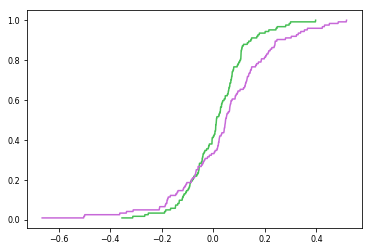

In [86]:
# Cumulative distributions of MIbeh only and MIbeh unique for A1
values_u, base_u = np.histogram(df_MI_unique_sorted.loc[full_model & is_active & A1, 'MIbeh_unique'], bins=1000)
cumulative_u = np.cumsum(values_u)
cumulative_u = cumulative_u / cumulative_u[-1]
values_o, base_o = np.histogram(df_MI_only_sorted.loc[full_model & is_active & A1, 'MIbeh_only'], bins=1000)
cumulative_o = np.cumsum(values_o)
cumulative_o = cumulative_o / cumulative_o[-1]
plt.plot(base_u[:-1], cumulative_u, c=color_p)
plt.plot(base_o[:-1], cumulative_o, c=color_b)
plt.savefig('cum_MIu_MIo_A1.pdf')

In [87]:
# Two-sample Kolmogorov-Smirnov A1
sci.ks_2samp(df_MI_unique_sorted.loc[full_model & is_active & A1, 'MIbeh_unique'], 
             df_MI_only_sorted.loc[full_model & is_active & A1, 'MIbeh_only'])                                                                 

Ks_2sampResult(statistic=0.22580645161290325, pvalue=0.0028902532137249919)

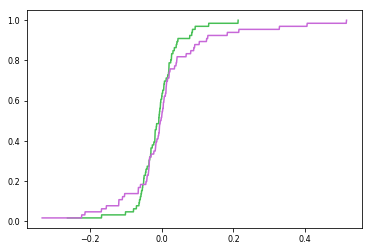

In [88]:
# Cumulative distributions of MIbeh only and MIbeh unique for ICC
values_u, base_u = np.histogram(df_MI_unique_sorted.loc[full_model & is_active & (ICC | ICX), 'MIbeh_unique'], bins=1000)
cumulative_u = np.cumsum(values_u)
cumulative_u = cumulative_u / cumulative_u[-1]
values_o, base_o = np.histogram(df_MI_only_sorted.loc[full_model & is_active & (ICC | ICX), 'MIbeh_only'], bins=1000)
cumulative_o = np.cumsum(values_o)
cumulative_o = cumulative_o / cumulative_o[-1]
plt.plot(base_u[:-1], cumulative_u, c=color_p)
plt.plot(base_o[:-1], cumulative_o, c=color_b)  
plt.savefig('cum_MIu_MIo_IC.pdf')

AttributeError: Unknown property density

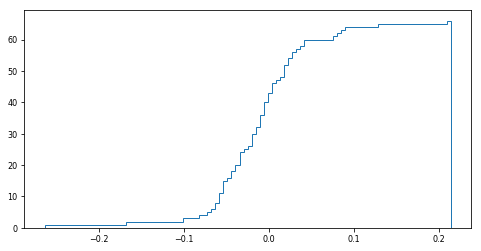

In [89]:
# Cumulative distributions of MIbeh only and MIbeh unique for IC
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(df_MI_unique_sorted.loc[full_model & is_active & (ICC | ICX), 'MIbeh_unique'],
                           bins=100, density=True, histtype='step',
                           cumulative=True, label='Empirical')


In [ ]:
# Cumulative distributions of MIbeh only and MIbeh unique for ICX
values_u, base_u = np.histogram(df_MI_unique_sorted.loc[full_model & is_active & ICX, 'MIbeh_unique'], bins=1000)
cumulative_u = np.cumsum(values_u)
values_o, base_o = np.histogram(df_MI_only_sorted.loc[full_model & is_active & ICX, 'MIbeh_only'], bins=1000)
cumulative_o = np.cumsum(values_o)
plt.plot(base_u[:-1], cumulative_u, c=color_p)
plt.plot(base_o[:-1], cumulative_o, c=color_b)  
#plt.savefig('cum_MIu_MIo_IC.pdf')

## Figure 5

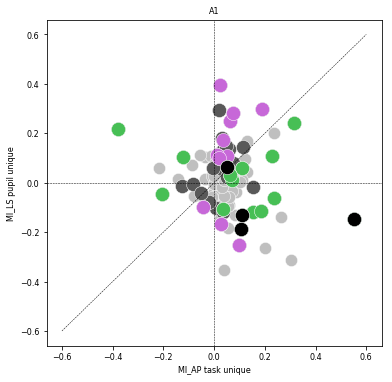

In [97]:
# A1
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=A1, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='MIpup_unique',
            y_column='MIbeh_unique', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            #highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
            save=False,
            xlabel='MI_AP task unique',
            ylabel='MI_LS pupil unique',
            title='A1',
            xlim=(-0.6,0.6),
            ylim=(-0.6,0.6))

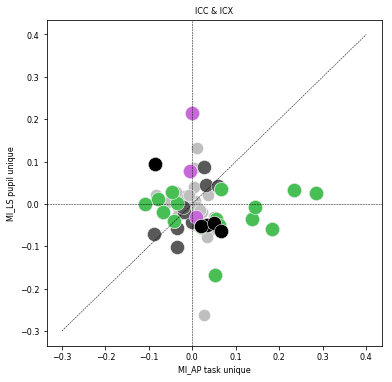

In [101]:
# IC
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=(ICX | ICC), 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='MIpup_unique',
            y_column='MIbeh_unique', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            #highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
            save=False,
            xlabel='MI_AP task unique',
            ylabel='MI_LS pupil unique',
            title='ICC & ICX',
            xlim=(-0.3,0.4),
            ylim=(-0.3,0.4))

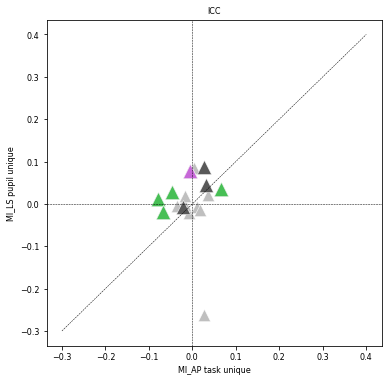

In [102]:
# ICC only
# IC
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=ICC, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='MIpup_unique',
            y_column='MIbeh_unique', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            #highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
            save=False,
            xlabel='MI_AP task unique',
            ylabel='MI_LS pupil unique',
            title='ICC',
            xlim=(-0.3,0.4),
            ylim=(-0.3,0.4))

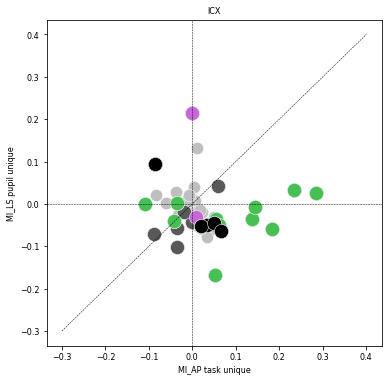

In [103]:
# ICX 
# IC
scat_states(x_model=full_model, 
            y_model=full_model, 
            beh_state=is_active, 
            area=ICX, 
            sig_list=[~sig_state, sig_state, sig_ubeh, sig_upup,sig_both], 
            x_column='MIpup_unique',
            y_column='MIbeh_unique', 
            color_list=[color_ns, color_either, color_b, color_p, color_both],
            #highlight_cellids={'TAR010c-27-2':'red', 'TAR010c-06-1':'blue'},
            save=False,
            xlabel='MI_AP task unique',
            ylabel='MI_LS pupil unique',
            title='ICX',
            xlim=(-0.3,0.4),
            ylim=(-0.3,0.4))